In [ ]:
# Data handling & manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

# Data visualization / EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split  # train/test splitting
from sklearn.preprocessing import StandardScaler      # scaling numeric features
from sklearn.preprocessing import LabelEncoder        # encode categorical labels (if needed)
from sklearn.model_selection import KFold             # K-fold cross-validation
from sklearn.model_selection import cross_val_score

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#### __Dataset 1:__ Taiwanese Bankruptcy Prediction

In [196]:
# Load dataset
df_bank = pd.read_csv("/Users/melody/Desktop/Melody-COGS118A-Final-Project/Datasets/Taiwanese Bankruptcy Prediction.csv")

# View first ten rows of dataset
df_bank.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025

##### Dataset setup

In [197]:
# Define features (X) and target (y)

y_bank = df_bank['Bankrupt?']
X_bank = df_bank.drop(columns = ['Bankrupt?'])

##### Data preprocessing    

_Feature scaling if needed (optional but helpful for logistic regression. No need for decision tree and random forest)_

In [198]:
# Check missing values
missing_cols = X_bank.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print('No missing values for X_bank' if len(missing_cols) == 0 else list(missing_cols.index))

missing_y = np.isnan(y_bank).sum()
missing_y = missing_y[missing_y > 0]
print('No missing values for y_bank' if missing_y == 0 else f'Missing values in y_bank: {missing_y}')

No missing values for X_bank
Missing values in y_bank: []


/var/folders/dg/t3mcsfd96l3f18_053nymk0r0000gn/T/ipykernel_49842/1530118999.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  print('No missing values for y_bank' if missing_y == 0 else f'Missing values in y_bank: {missing_y}')


##### Basic EDA    
Check feature types, ranges, distributions  
Class distribution histograms

In [199]:
# Check feature types
print("Feature Types: \n", X_bank.dtypes)

# View min, max, mean, standard deviation
print("\n Stats Summary: \n", X_bank.describe())

Feature Types: 
 ROA(C) before interest and depreciation before interest    float64
ROA(A) before interest and % after tax                     float64
ROA(B) before interest and depreciation after tax          float64
Operating Gross Margin                                     float64
Realized Sales Gross Margin                                float64
                                                            ...   
Liability to Equity                                        float64
Degree of Financial Leverage (DFL)                         float64
Interest Coverage Ratio (Interest expense to EBIT)         float64
Net Income Flag                                              int64
Equity to Liability                                        float64
Length: 95, dtype: object

 Stats Summary: 
        ROA(C) before interest and depreciation before interest  ROA(A) before interest and % after tax  ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
count               

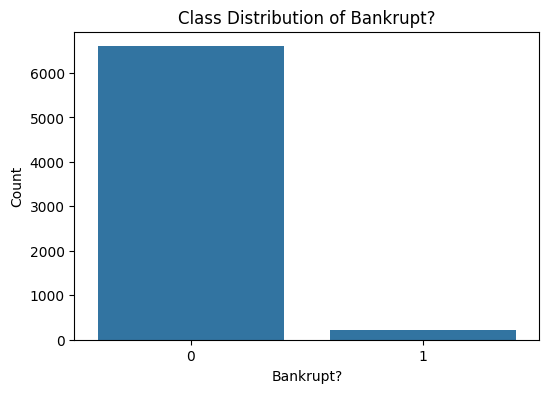

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


In [200]:
# View dataset distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y_bank)
plt.title('Class Distribution of Bankrupt?')
plt.xlabel('Bankrupt?')
plt.ylabel('Count')

plt.show()

print(y_bank.value_counts())

#### __Dataset 2:__ Breast Cancer Wisconsin (Diagnostic)

In [201]:
# Load dataset and assign column names
cancer_columns = ['ID', 'Diagnosis',
                  'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1',
                  'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1',
                  'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2',
                  'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2',
                  'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3',
                  'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']

df_cancer = pd.read_csv("/Users/melody/Desktop/Melody-COGS118A-Final-Project/Datasets/Breast Cancer Wisconsin Diagnostic/wdbc.data", names = cancer_columns)

# View first ten rows of dataset
df_cancer.head(10)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


##### Dataset setup

In [202]:
# Convert target y to numerical value: M = 1, B = 0
df_cancer['Diagnosis'] = df_cancer['Diagnosis'].str.strip()     # Remove white spaces before and after 'M' and 'B'
df_cancer['Diagnosis'] = df_cancer['Diagnosis'].map({'M': 1, 'B': 0})

# Define features (X) and target (y)
y_cancer = df_cancer['Diagnosis']
X_cancer = df_cancer.drop(columns = ['Diagnosis'])

df_cancer.head(10)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


##### Data preprocessing    

_Feature scaling if needed (optional but helpful for logistic regression. No need for decision tree and random forest)_

In [203]:
# Check missing values
missing_X = X_cancer.isnull().sum()
missing_X = missing_X[missing_X > 0]
print('No missing values' if len(missing_X) == 0 else list(missing_X.index))

missing_y = np.isnan(y_cancer).sum()
missing_y = missing_y[missing_y > 0]
print('No missing values for y_cancer' if missing_y == 0 else f'Missing values in y_cancer: {missing_y}')


No missing values
Missing values in y_cancer: []


/var/folders/dg/t3mcsfd96l3f18_053nymk0r0000gn/T/ipykernel_49842/4159060361.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  print('No missing values for y_cancer' if missing_y == 0 else f'Missing values in y_cancer: {missing_y}')


##### Basic EDA    
Check feature types, ranges, distributions  
Class distribution histograms

In [204]:
# Check feature types
print("Feature Types: \n", X_cancer.dtypes)

# View min, max, mean, standard deviation
print("\n Stats Summary: \n", X_cancer.describe())

Feature Types: 
 ID                      int64
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
dtype: object

 Stats Summary: 
                  ID 

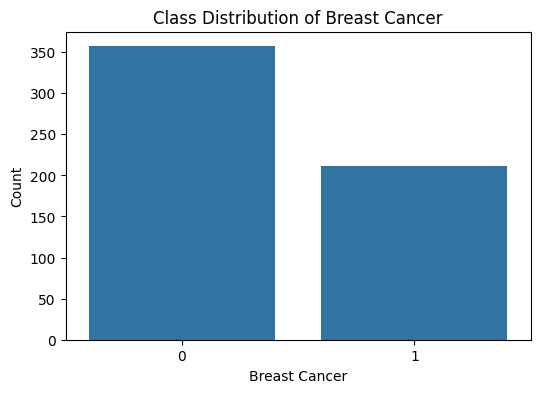

Diagnosis
0    357
1    212
Name: count, dtype: int64


In [205]:
# View dataset distribution

plt.figure(figsize=(6,4))
sns.countplot(x=y_cancer)
plt.title('Class Distribution of Breast Cancer')
plt.xlabel('Breast Cancer')
plt.ylabel('Count')

plt.show()

print(y_cancer.value_counts())

#### __Dataset 3:__ Blood Transfusion Service Center

In [206]:
# Load dataset
df_blood = pd.read_csv("/Users/melody/Desktop/Melody-COGS118A-Final-Project/Datasets/Blood Transfusion Service Center/Blood Transfusion Service Center.data")

# View first ten rows of dataset
df_blood.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


##### Dataset setup

In [207]:
# Define features (X) and target (y)
y_blood = df_blood['whether he/she donated blood in March 2007']
X_blood = df_blood.drop(columns = ['whether he/she donated blood in March 2007'])

##### Data preprocessing    

_Feature scaling if needed (optional but helpful for logistic regression. No need for decision tree and random forest)_

In [208]:
# Check missing values
missing_cols = X_blood.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print('No missing values' if len(missing_cols) == 0 else list(missing_cols.index))

missing_y = np.isnan(y_blood).sum()
missing_y = missing_y[missing_y > 0]
print('No missing values for y_blood' if missing_y == 0 else f'Missing values in y_blood: {missing_y}')

No missing values
Missing values in y_blood: []


/var/folders/dg/t3mcsfd96l3f18_053nymk0r0000gn/T/ipykernel_49842/2242090603.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  print('No missing values for y_blood' if missing_y == 0 else f'Missing values in y_blood: {missing_y}')


##### Basic EDA    
Check feature types, ranges, distributions  
Class distribution histograms

In [209]:
# Check feature types
print("Feature Types: \n", X_blood.dtypes)

# View min, max, mean, standard deviation
print("\n Stats Summary: \n", X_blood.describe())

Feature Types: 
 Recency (months)         int64
Frequency (times)        int64
Monetary (c.c. blood)    int64
Time (months)            int64
dtype: object

 Stats Summary: 
        Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
count        748.000000         748.000000             748.000000     748.000000
mean           9.506684           5.514706            1378.676471      34.282086
std            8.095396           5.839307            1459.826781      24.376714
min            0.000000           1.000000             250.000000       2.000000
25%            2.750000           2.000000             500.000000      16.000000
50%            7.000000           4.000000            1000.000000      28.000000
75%           14.000000           7.000000            1750.000000      50.000000
max           74.000000          50.000000           12500.000000      98.000000


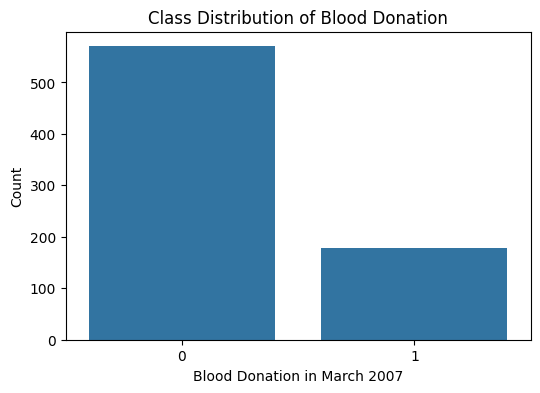

whether he/she donated blood in March 2007
0    570
1    178
Name: count, dtype: int64


In [210]:
# View dataset distribution

plt.figure(figsize=(6,4))
sns.countplot(x=y_blood)
plt.title('Class Distribution of Blood Donation')
plt.xlabel('Blood Donation in March 2007')
plt.ylabel('Count')
plt.show()

print(y_blood.value_counts())

#### __Classifier 1:__ Logistic Regression Classifier

##### Logistic regression components

In [211]:
# X = feature matrix, y = class labels {0,1}

# Sigmoid function
def sigmoid(z):
    z = np.clip(z, -500, 500)           # clip values to prevent overflow
    return 1.0 / (1.0 + np.exp(-z))


# Logistic loss function L = - Σ [ y log(p) + (1-y) log(1-p)]
def logistic_loss(X, y, W, b, lam=0.0):
    linear = X @ W + b
    p = sigmoid(linear)
    eps = 1e-12

    loss = -np.mean(y * np.log(p + eps) + (1 - y) * np.log(1 - p + eps))

    # L2 regularization
    reg = (lam / 2) * np.sum(W**2)

    return loss + reg


# Gradient
def logistic_gradient(X, y, W, b, lam=0.0):
    linear = X @ W + b
    p = sigmoid(linear)
    n_samples = X.shape[0]

    grad_W = (X.T @ (p - y)) / n_samples + lam * W      # grad_W = Xᵀ (p - y)
    grad_b = np.sum(p - y) / n_samples                  # grad_b = Σ (p - y)

    return grad_W, grad_b


# Logistic regression training (gradient descent)
def logistic_regression(X_train, y_train, lr=0.001, lam=0.0, iterations=10000):
    losses = []
    n_samples, n_features = X_train.shape

    W = np.zeros(n_features)
    b = 0.0

    for _ in range(iterations):

        grad_W, grad_b = logistic_gradient(X_train, y_train, W, b, lam)

        W -= lr * grad_W
        b -= lr * grad_b

        loss = logistic_loss(X_train, y_train, W, b, lam)
        losses.append(loss)

    return W, b, losses


# Decision rule
def f_logistic(x, W, b):
    score = np.dot(W, x) + b
    p_pos = sigmoid(score)
    return 1 if p_pos >= 0.5 else 0


# Classification error
def calc_error(X, Y, W, b):
    n = X.shape[0]
    errors = 0

    for xi, yi in zip(X, Y):
        pred = f_logistic(xi, W, b)
        if pred != yi:
            errors += 1

    return errors / float(n)

##### Cross validation

In [212]:
# 5-fold cross-validation split
def cross_validation_split(X, y, K=5):
    m = X.shape[0]
    idx = np.random.permutation(m)
    folds = np.array_split(idx, K)
    return folds


# Cross-validation for one hyperparameter setting
def cross_validate_logistic(X, y, lr, lam, iterations=10000, K=5):

    folds = cross_validation_split(X, y, K)
    val_accs = []

    for k in range(K):
        val_idx = folds[k]
        train_idx = np.hstack([folds[i] for i in range(K) if i != k])

        X_train, y_train = X[train_idx], y[train_idx]
        X_val,   y_val   = X[val_idx], y[val_idx]

        # scale
        mean = X_train.mean(axis=0)
        std  = X_train.std(axis=0) + 1e-8
        X_train = (X_train - mean) / std
        X_val   = (X_val   - mean) / std

        # train
        W, b, loss_cv = logistic_regression(X_train, y_train, lr=lr, lam=lam, iterations=iterations)

        # validation accuracy
        preds = [f_logistic(xi, W, b) for xi in X_val]
        acc = 1 - calc_error(X_val, y_val, W, b)
        val_accs.append(acc)

    return val_accs, np.mean(val_accs)

##### Trial & Partition

In [213]:
# Run 1 trial
def run_logistic_trial(X, y, hyperparams, train_ratio, iterations=10000):
    # ensure X and y are NumPy arrays
    X = X.values if isinstance(X, pd.DataFrame) else X
    y = y.values if isinstance(y, (pd.Series, pd.DataFrame)) else y

    # shuffle
    idx = np.random.permutation(len(y))
    X, y = X[idx], y[idx]

    # split
    split = int(train_ratio * len(y))
    X_train, y_train = X[:split], y[:split]
    X_test,  y_test  = X[split:], y[split:]

    # scale
    mean = X_train.mean(axis=0)
    std  = X_train.std(axis=0) + 1e-8
    X_train = (X_train - mean) / std
    X_test  = (X_test  - mean) / std

    # hyperparameter tuning
    best_acc = -1
    best_lr, best_lam = None, None

    for lr, lam in hyperparams:
        val_list, val_mean = cross_validate_logistic(
            X_train, y_train, lr=lr, lam=lam, iterations=iterations
        )
        if val_mean > best_acc:
            best_acc = val_mean
            best_lr, best_lam = lr, lam

    # train final model
    W, b, losses = logistic_regression(X_train, y_train, lr=best_lr, lam=best_lam, iterations=iterations)

    # compute accuracies
    train_acc = 1 - calc_error(X_train, y_train, W, b)
    test_acc  = 1 - calc_error(X_test,  y_test,  W, b)

    return train_acc, test_acc, losses, (best_lr, best_lam), best_acc


# Run a whole PARTITION (3 trials)
def run_logistic_partition(X, y, hyperparams, train_ratio, iterations=10000):
    train_accs = []
    test_accs  = []
    best_hyperparams_list = []
    best_cv_acc_list = []

    best_losses = None
    best_test_acc = -1  # for accuracy, higher is better

    for trial_index in range(3):
        tr_acc, te_acc, losses, best_hyperparams, best_cv_acc = run_logistic_trial(
            X, y, hyperparams, train_ratio, iterations
        )

        train_accs.append(tr_acc)
        test_accs.append(te_acc)
        best_hyperparams_list.append(best_hyperparams)
        best_cv_acc_list.append(best_cv_acc)

        if te_acc > best_test_acc:
            best_test_acc = te_acc
            best_losses = losses  # keep best trial's curve

    # Compute average CV accuracy across the 3 trials
    avg_cv_acc = np.mean(best_cv_acc_list)

    return (
        np.mean(train_accs),
        np.mean(test_accs),
        best_losses,
        train_accs,
        test_accs,
        best_hyperparams_list,
        best_cv_acc_list,
        avg_cv_acc
    )

##### Define hyperparameters    
Vary regularization strength, fix learning rate

In [214]:
hyperparams_logistic = [
    {"lr": 0.001, "lam": 0.001, "iterations": 10000},
    {"lr": 0.001, "lam": 0.01,  "iterations": 10000},
    {"lr": 0.001, "lam": 0.1,   "iterations": 10000}
]

print("Defined hyperparameter grid for Logistic Regression:")
for hp in hyperparams_logistic:
    print(hp)

Defined hyperparameter grid for Logistic Regression:
{'lr': 0.001, 'lam': 0.001, 'iterations': 10000}
{'lr': 0.001, 'lam': 0.01, 'iterations': 10000}
{'lr': 0.001, 'lam': 0.1, 'iterations': 10000}


##### Run logistic regression on 80/20 partition

Bankruptcy Dataset

In [215]:
# Define train/test split ratio
train_ratio_80 = 0.8

# Prepare hyperparameter list for logistic regression
hyperparam_list = [(hp["lr"], hp["lam"]) for hp in hyperparams_logistic]

# Run the full 80/20 partition (3 trials)
avg_train_bank_80_log, avg_test_bank_80_log, best_losses_bank_80_log, train_accs_bank_80_log, test_accs_bank_80_log, \
best_hyperparams_list_bank_80_log, best_cv_acc_list_bank_80_log, avg_cv_acc_bank_80_log = run_logistic_partition(
    X_bank, y_bank,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_80,
    iterations=10000
)

# Print results
print("===== Logistic Regression: Bankruptcy Dataset (80/20 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_bank_80_log:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_bank_80_log:.4f}")
print("Individual trial Train Accuracies:", train_accs_bank_80_log)
print("Individual trial Test Accuracies :", test_accs_bank_80_log)
print("Best hyperparameters per trial :", best_hyperparams_list_bank_80_log)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_bank_80_log)
print(f"Average CV accuracy across trials: {avg_cv_acc_bank_80_log:.4f}")
print("Best trial selected loss curve length:", len(best_losses_bank_80_log))

===== Logistic Regression: Bankruptcy Dataset (80/20 Partition) =====
Average Training Accuracy (3 trials): 0.9710
Average Testing Accuracy  (3 trials): 0.9631
Individual trial Train Accuracies: [0.9706691109074244, 0.970852428964253, 0.9714023831347388]
Individual trial Test Accuracies : [0.9648093841642229, 0.9618768328445748, 0.9626099706744868]
Best hyperparameters per trial : [(0.001, 0.1), (0.001, 0.1), (0.001, 0.001)]
CV accuracy of best hyperparameters per trial : [np.float64(0.9695692025664527), np.float64(0.9697525206232814), np.float64(0.9695692025664527)]
Average CV accuracy across trials: 0.9696
Best trial selected loss curve length: 10000


Breast Cancer Dataset

In [216]:
# Define train/test split ratio
train_ratio_80 = 0.8

# Prepare hyperparameter list for logistic regression
hyperparam_list = [(hp["lr"], hp["lam"]) for hp in hyperparams_logistic]

# Run the full 80/20 partition (3 trials)
avg_train_cancer_80_log, avg_test_cancer_80_log, best_losses_cancer_80_log, train_accs_cancer_80_log, test_accs_cancer_80_log, \
best_hyperparams_list_cancer_80_log, best_cv_acc_list_cancer_80_log, avg_cv_acc_cancer_80_log = run_logistic_partition(
    X_cancer, y_cancer,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_80,
    iterations=10000
)

# Print results
print("===== Logistic Regression: Breast Cancer Dataset (80/20 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_cancer_80_log:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_cancer_80_log:.4f}")
print("Individual trial Train Accuracies:", train_accs_cancer_80_log)
print("Individual trial Test Accuracies :", test_accs_cancer_80_log)
print("Best hyperparameters per trial :", best_hyperparams_list_cancer_80_log)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_cancer_80_log)
print(f"Average CV accuracy across trials: {avg_cv_acc_cancer_80_log:.4f}")
print("Best trial selected loss curve length:", len(best_losses_cancer_80_log))

===== Logistic Regression: Breast Cancer Dataset (80/20 Partition) =====
Average Training Accuracy (3 trials): 0.9824
Average Testing Accuracy  (3 trials): 0.9620
Individual trial Train Accuracies: [0.9868131868131869, 0.978021978021978, 0.9824175824175824]
Individual trial Test Accuracies : [0.9649122807017544, 0.9649122807017544, 0.956140350877193]
Best hyperparameters per trial : [(0.001, 0.001), (0.001, 0.001), (0.001, 0.001)]
CV accuracy of best hyperparameters per trial : [np.float64(0.9802197802197803), np.float64(0.9758241758241759), np.float64(0.9846153846153847)]
Average CV accuracy across trials: 0.9802
Best trial selected loss curve length: 10000


Blood Donation Dataset

In [217]:
# Define train/test split ratio
train_ratio_80 = 0.8

# Prepare hyperparameter list for logistic regression
hyperparam_list = [(hp["lr"], hp["lam"]) for hp in hyperparams_logistic]

# Run the full 80/20 partition (3 trials)
avg_train_blood_80_log, avg_test_blood_80_log, best_losses_blood_80_log, train_accs_blood_80_log, test_accs_blood_80_log, \
best_hyperparams_list_blood_80_log, best_cv_acc_list_blood_80_log, avg_cv_acc_blood_80_log = run_logistic_partition(
    X_blood, y_blood,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_80,
    iterations=10000
)

# Print results
print("===== Logistic Regression: Blood Donation Dataset (80/20 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_blood_80_log:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_blood_80_log:.4f}")
print("Individual trial Train Accuracies:", train_accs_blood_80_log)
print("Individual trial Test Accuracies:", test_accs_blood_80_log)
print("Best hyperparameters per trial:", best_hyperparams_list_blood_80_log)
print("CV accuracy of best hyperparameters per trial:", best_cv_acc_list_blood_80_log)
print(f"Average CV accuracy across trials: {avg_cv_acc_blood_80_log:.4f}")
print("Best trial selected loss curve length:", len(best_losses_blood_80_log))

===== Logistic Regression: Blood Donation Dataset (80/20 Partition) =====
Average Training Accuracy (3 trials): 0.7754
Average Testing Accuracy  (3 trials): 0.7756
Individual trial Train Accuracies: [0.765886287625418, 0.782608695652174, 0.7775919732441472]
Individual trial Test Accuracies: [0.7933333333333333, 0.7533333333333333, 0.78]
Best hyperparameters per trial: [(0.001, 0.1), (0.001, 0.001), (0.001, 0.01)]
CV accuracy of best hyperparameters per trial: [np.float64(0.7691736694677871), np.float64(0.7827450980392155), np.float64(0.7776330532212885)]
Average CV accuracy across trials: 0.7765
Best trial selected loss curve length: 10000


##### Run logistic regression on 50/50 partition

Bankruptcy Dataset

In [218]:
# Define train/test split ratio
train_ratio_50 = 0.5

# Prepare hyperparameter list for logistic regression
hyperparam_list = [(hp["lr"], hp["lam"]) for hp in hyperparams_logistic]

# Run the full 50/50 partition (3 trials)
avg_train_bank_50_log, avg_test_bank_50_log, best_losses_bank_50_log, train_accs_bank_50_log, test_accs_bank_50_log, \
best_hyperparams_list_bank_50_log, best_cv_acc_list_bank_50_log, avg_cv_acc_bank_50_log = run_logistic_partition(
    X_bank, y_bank,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_50,
    iterations=10000
)

# Print results
print("===== Logistic Regression: Bankruptcy Dataset (50/50 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_bank_50_log:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_bank_50_log:.4f}")
print("Individual trial Train Accuracies:", train_accs_bank_50_log)
print("Individual trial Test Accuracies:", test_accs_bank_50_log)
print("Best hyperparameters per trial:", best_hyperparams_list_bank_50_log)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_bank_50_log)
print(f"Average CV accuracy across trials: {avg_cv_acc_bank_50_log:.4f}")
print("Best trial selected loss curve length:", len(best_losses_bank_50_log))

===== Logistic Regression: Bankruptcy Dataset (50/50 Partition) =====
Average Training Accuracy (3 trials): 0.9689
Average Testing Accuracy  (3 trials): 0.9695
Individual trial Train Accuracies: [0.9677324728659431, 0.9718392490466412, 0.9671457905544147]
Individual trial Test Accuracies: [0.9706744868035191, 0.9671554252199414, 0.9706744868035191]
Best hyperparameters per trial: [(0.001, 0.001), (0.001, 0.1), (0.001, 0.1)]
CV accuracy of best hyperparameters per trial : [np.float64(0.9659725003337339), np.float64(0.968907204774762), np.float64(0.9653855594455282)]
Average CV accuracy across trials: 0.9668
Best trial selected loss curve length: 10000


Breast Cancer Dataset

In [219]:
# Define train/test split ratio
train_ratio_50 = 0.5

# Prepare hyperparameter list for logistic regression
hyperparam_list = [(hp["lr"], hp["lam"]) for hp in hyperparams_logistic]

# Run the full 50/50 partition (3 trials)
avg_train_cancer_50_log, avg_test_cancer_50_log, best_losses_cancer_50_log, train_accs_cancer_50_log, test_accs_cancer_50_log, \
best_hyperparams_list_cancer_50_log, best_cv_acc_list_cancer_50_log, avg_cv_acc_cancer_50_log = run_logistic_partition(
    X_cancer, y_cancer,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_50,
    iterations=10000
)

# Print results
print("===== Logistic Regression: Breast Cancer Dataset (50/50 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_cancer_50_log:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_cancer_50_log:.4f}")
print("Individual trial Train Accuracies:", train_accs_cancer_50_log)
print("Individual trial Test Accuracies:", test_accs_cancer_50_log)
print("Best hyperparameters per trial :", best_hyperparams_list_cancer_50_log)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_cancer_50_log)
print(f"Average CV accuracy across trials: {avg_cv_acc_cancer_50_log:.4f}")
print("Best trial selected loss curve length:", len(best_losses_cancer_50_log))

===== Logistic Regression: Breast Cancer Dataset (50/50 Partition) =====
Average Training Accuracy (3 trials): 0.9789
Average Testing Accuracy  (3 trials): 0.9766
Individual trial Train Accuracies: [0.9823943661971831, 0.9788732394366197, 0.9753521126760564]
Individual trial Test Accuracies: [0.9754385964912281, 0.9719298245614035, 0.9824561403508771]
Best hyperparameters per trial : [(0.001, 0.01), (0.001, 0.01), (0.001, 0.001)]
CV accuracy of best hyperparameters per trial : [np.float64(0.9788847117794486), np.float64(0.9789473684210528), np.float64(0.9752506265664159)]
Average CV accuracy across trials: 0.9777
Best trial selected loss curve length: 10000


Blood Donation Dataset

In [220]:
# Define train/test split ratio
train_ratio_50 = 0.5

# Prepare hyperparameter list for logistic regression
hyperparam_list = [(hp["lr"], hp["lam"]) for hp in hyperparams_logistic]

# Run the full 50/50 partition (3 trials)
avg_train_blood_50_log, avg_test_blood_50_log, best_losses_blood_50_log, train_accs_blood_50_log, test_accs_blood_50_log, \
best_hyperparams_list_blood_50_log, best_cv_acc_list_blood_50_log, avg_cv_acc_blood_50_log = run_logistic_partition(
    X_blood, y_blood,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_50,
    iterations=10000
)

# Print results
print("===== Logistic Regression: Blood Donation Dataset (50/50 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_blood_50_log:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_blood_50_log:.4f}")
print("Individual trial Train Accuracies:", train_accs_blood_50_log)
print("Individual trial Test Accuracies:", test_accs_blood_50_log)
print("Best hyperparameters per trial :", best_hyperparams_list_blood_50_log)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_blood_50_log)
print(f"Average CV accuracy across trials: {avg_cv_acc_blood_50_log:.4f}")
print("Best trial selected loss curve length:", len(best_losses_blood_50_log))

===== Logistic Regression: Blood Donation Dataset (50/50 Partition) =====
Average Training Accuracy (3 trials): 0.7629
Average Testing Accuracy  (3 trials): 0.7834
Individual trial Train Accuracies: [0.786096256684492, 0.7540106951871658, 0.7486631016042781]
Individual trial Test Accuracies: [0.7647058823529411, 0.7967914438502673, 0.7887700534759359]
Best hyperparameters per trial : [(0.001, 0.01), (0.001, 0.01), (0.001, 0.01)]
CV accuracy of best hyperparameters per trial : [np.float64(0.7889369369369369), np.float64(0.7512072072072072), np.float64(0.7564684684684684)]
Average CV accuracy across trials: 0.7655
Best trial selected loss curve length: 10000


##### Run logistic regression on 20/80 partition

Bankruptcy Dataset

In [221]:
# Define train/test split ratio
train_ratio_20 = 0.2

# Prepare hyperparameter list for logistic regression
hyperparam_list = [(hp["lr"], hp["lam"]) for hp in hyperparams_logistic]

# Run the full 20/80 partition (3 trials)
avg_train_bank_20_log, avg_test_bank_20_log, best_losses_bank_20_log, train_accs_bank_20_log, test_accs_bank_20_log, \
best_hyperparams_list_bank_20_log, best_cv_acc_list_bank_20_log, avg_cv_acc_bank_20_log = run_logistic_partition(
    X_bank, y_bank,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_20,
    iterations=10000
)

# Print results
print("===== Logistic Regression: Bankruptcy Dataset (20/80 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_bank_20_log:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_bank_20_log:.4f}")
print("Individual trial Train Accuracies:", train_accs_bank_20_log)
print("Individual trial Test Accuracies:", test_accs_bank_20_log)
print("Best hyperparameters per trial :", best_hyperparams_list_bank_20_log)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_bank_20_log)
print(f"Average CV accuracy across trials: {avg_cv_acc_bank_20_log:.4f}")
print("Best trial selected loss curve length:", len(best_losses_bank_20_log))

===== Logistic Regression: Bankruptcy Dataset (20/80 Partition) =====
Average Training Accuracy (3 trials): 0.9726
Average Testing Accuracy  (3 trials): 0.9643
Individual trial Train Accuracies: [0.9735876742479824, 0.9765223771093177, 0.9677182685253118]
Individual trial Test Accuracies: [0.9642595307917888, 0.9646260997067448, 0.9640762463343109]
Best hyperparameters per trial : [(0.001, 0.1), (0.001, 0.01), (0.001, 0.01)]
CV accuracy of best hyperparameters per trial : [np.float64(0.9684496875673346), np.float64(0.9691849816849816), np.float64(0.9633053221288514)]
Average CV accuracy across trials: 0.9670
Best trial selected loss curve length: 10000


Breast Cancer Dataset

In [222]:
# Define train/test split ratio
train_ratio_20 = 0.2

# Prepare hyperparameter list for logistic regression
hyperparam_list = [(hp["lr"], hp["lam"]) for hp in hyperparams_logistic]

# Run the full 20/80 partition (3 trials)
avg_train_cancer_20_log, avg_test_cancer_20_log, best_losses_cancer_20_log, train_accs_cancer_20_log, test_accs_cancer_20_log, \
best_hyperparams_list_cancer_20_log, best_cv_acc_list_cancer_20_log, avg_cv_acc_cancer_20_log = run_logistic_partition(
    X_cancer, y_cancer,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_20,
    iterations=10000
)

# Print results
print("===== Logistic Regression: Breast Cancer Dataset (20/80 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_cancer_20_log:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_cancer_20_log:.4f}")
print("Individual trial Train Accuracies:", train_accs_cancer_20_log)
print("Individual trial Test Accuracies:", test_accs_cancer_20_log)
print("Best hyperparameters per trial :", best_hyperparams_list_cancer_20_log)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_cancer_20_log)
print(f"Average CV accuracy across trials: {avg_cv_acc_cancer_20_log:.4f}")
print("Best trial selected loss curve length:", len(best_losses_cancer_20_log))

===== Logistic Regression: Breast Cancer Dataset (20/80 Partition) =====
Average Training Accuracy (3 trials): 0.9882
Average Testing Accuracy  (3 trials): 0.9708
Individual trial Train Accuracies: [1.0, 0.9734513274336283, 0.9911504424778761]
Individual trial Test Accuracies: [0.9649122807017544, 0.9780701754385965, 0.9692982456140351]
Best hyperparameters per trial : [(0.001, 0.01), (0.001, 0.01), (0.001, 0.01)]
CV accuracy of best hyperparameters per trial : [np.float64(0.990909090909091), np.float64(0.9387351778656127), np.float64(0.9739130434782609)]
Average CV accuracy across trials: 0.9679
Best trial selected loss curve length: 10000


Blood Donation Dataset

In [223]:
# Define train/test split ratio
train_ratio_20 = 0.2

# Prepare hyperparameter list for logistic regression
hyperparam_list = [(hp["lr"], hp["lam"]) for hp in hyperparams_logistic]

# Run the full 20/80 partition (3 trials)
avg_train_blood_20_log, avg_test_blood_20_log, best_losses_blood_20_log, train_accs_blood_20_log, test_accs_blood_20_log, \
best_hyperparams_list_blood_20_log, best_cv_acc_list_blood_20_log, avg_cv_acc_blood_20_log = run_logistic_partition(
    X_blood, y_blood,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_20,
    iterations=10000
)

# Print results
print("===== Logistic Regression: Blood Donation Dataset (20/80 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_blood_20_log:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_blood_20_log:.4f}")
print("Individual trial Train Accuracies:", train_accs_blood_20_log)
print("Individual trial Test Accuracies:", test_accs_blood_20_log)
print("Best hyperparameters per trial :", best_hyperparams_list_blood_20_log)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_blood_20_log)
print(f"Average CV accuracy across trials: {avg_cv_acc_blood_20_log:.4f}")
print("Best trial selected loss curve length:", len(best_losses_blood_20_log))

===== Logistic Regression: Blood Donation Dataset (20/80 Partition) =====
Average Training Accuracy (3 trials): 0.7450
Average Testing Accuracy  (3 trials): 0.7824
Individual trial Train Accuracies: [0.7583892617449665, 0.7449664429530201, 0.7315436241610738]
Individual trial Test Accuracies: [0.7896494156928213, 0.7829716193656093, 0.7746243739565943]
Best hyperparameters per trial : [(0.001, 0.001), (0.001, 0.01), (0.001, 0.01)]
CV accuracy of best hyperparameters per trial : [np.float64(0.7648275862068965), np.float64(0.7455172413793104), np.float64(0.724367816091954)]
Average CV accuracy across trials: 0.7449
Best trial selected loss curve length: 10000


##### Data Summary

In [224]:
results = {
    'bankruptcy': {
        '80/20': {
            'train_acc': avg_train_bank_80_log,
            'test_acc' : avg_test_bank_80,
            'best_hyperparams': best_hyperparams_list_bank_80_log,
            'cv_acc': best_cv_acc_list_bank_80_log,
            'avg_cv_acc': avg_cv_acc_bank_80_log,
            'best_loss_curve_len': len(best_losses_bank_80_log)
        },
        '50/50': {
            'train_acc': avg_train_bank_50_log,
            'test_acc' : avg_test_bank_50_log,
            'best_hyperparams': best_hyperparams_list_bank_50_log,
            'cv_acc': best_cv_acc_list_bank_50_log,
            'avg_cv_acc': avg_cv_acc_bank_50_log,
            'best_loss_curve_len': len(best_losses_bank_50_log)
        },
        '20/80': {
            'train_acc': avg_train_bank_20_log,
            'test_acc' : avg_test_bank_20_log,
            'best_hyperparams': best_hyperparams_list_bank_20_log,
            'cv_acc': best_cv_acc_list_bank_20_log,
            'avg_cv_acc': avg_cv_acc_bank_20_log,
            'best_loss_curve_len': len(best_losses_bank_20_log)
        }
    },
    'breast cancer': {
        '80/20': {
            'train_acc': avg_train_cancer_80_log,
            'test_acc' : avg_test_cancer_80_log,
            'best_hyperparams': best_hyperparams_list_cancer_80_log,
            'cv_acc': best_cv_acc_list_cancer_80_log,
            'avg_cv_acc': avg_cv_acc_cancer_80_log,
            'best_loss_curve_len': len(best_losses_cancer_80_log)
        },
        '50/50': {
            'train_acc': avg_train_cancer_50_log,
            'test_acc' : avg_test_cancer_50_log,
            'best_hyperparams': best_hyperparams_list_cancer_50_log,
            'cv_acc': best_cv_acc_list_cancer_50_log,
            'avg_cv_acc': avg_cv_acc_cancer_50_log,
            'best_loss_curve_len': len(best_losses_cancer_50_log)
        },
        '20/80': {
            'train_acc': avg_train_cancer_20_log,
            'test_acc' : avg_test_cancer_20_log,
            'best_hyperparams': best_hyperparams_list_cancer_20_log,
            'cv_acc': best_cv_acc_list_cancer_20_log,
            'avg_cv_acc': avg_cv_acc_cancer_20_log,
            'best_loss_curve_len': len(best_losses_cancer_20_log)
        }
    },
    'blood donation': {
        '80/20': {
            'train_acc': avg_train_blood_80_log,
            'test_acc' : avg_test_blood_80_log,
            'best_hyperparams': best_hyperparams_list_blood_80_log,
            'cv_acc': best_cv_acc_list_blood_80_log,
            'avg_cv_acc': avg_cv_acc_blood_80_log,
            'best_loss_curve_len': len(best_losses_blood_80_log)
        },
        '50/50': {
            'train_acc': avg_train_blood_50_log,
            'test_acc' : avg_test_blood_50_log,
            'best_hyperparams': best_hyperparams_list_blood_50_log,
            'cv_acc': best_cv_acc_list_blood_50_log,
            'avg_cv_acc': avg_cv_acc_blood_50_log,
            'best_loss_curve_len': len(best_losses_blood_50_log)
        },
        '20/80': {
            'train_acc': avg_train_blood_20_log,
            'test_acc' : avg_test_blood_20_log,
            'best_hyperparams': best_hyperparams_list_blood_20_log,
            'cv_acc': best_cv_acc_list_blood_20_log,
            'avg_cv_acc': avg_cv_acc_blood_20_log,
            'best_loss_curve_len': len(best_losses_blood_20_log)
        }
    }
}


for dataset, partitions in results.items():
    print(f"===== Dataset: {dataset.upper()} =====")
    for part, metrics in partitions.items():
        print(f"Partition {part}:")
        print(f"  Avg Train Accuracy       : {metrics['train_acc']:.4f}")
        print(f"  Avg Test Accuracy        : {metrics['test_acc']:.4f}")
        print(f"  Best Hyperparams per Trial: {metrics['best_hyperparams']}")
        print(f"  CV Accuracy per Trial       : {metrics['cv_acc']}")
        print(f"  Avg CV Accuracy             : {metrics['avg_cv_acc']:.4f}")
        print(f"  Best Loss Curve Length      : {metrics['best_loss_curve_len']}")
    print("\n")

===== Dataset: BANKRUPTCY =====
Partition 80/20:
  Avg Train Accuracy       : 0.9710
  Avg Test Accuracy        : 0.9685
  Best Hyperparams per Trial: [(0.001, 0.1), (0.001, 0.1), (0.001, 0.001)]
  CV Accuracy per Trial       : [np.float64(0.9695692025664527), np.float64(0.9697525206232814), np.float64(0.9695692025664527)]
  Avg CV Accuracy             : 0.9696
  Best Loss Curve Length      : 10000
Partition 50/50:
  Avg Train Accuracy       : 0.9689
  Avg Test Accuracy        : 0.9695
  Best Hyperparams per Trial: [(0.001, 0.001), (0.001, 0.1), (0.001, 0.1)]
  CV Accuracy per Trial       : [np.float64(0.9659725003337339), np.float64(0.968907204774762), np.float64(0.9653855594455282)]
  Avg CV Accuracy             : 0.9668
  Best Loss Curve Length      : 10000
Partition 20/80:
  Avg Train Accuracy       : 0.9726
  Avg Test Accuracy        : 0.9643
  Best Hyperparams per Trial: [(0.001, 0.1), (0.001, 0.01), (0.001, 0.01)]
  CV Accuracy per Trial       : [np.float64(0.9684496875673346), 

##### Loss Curve

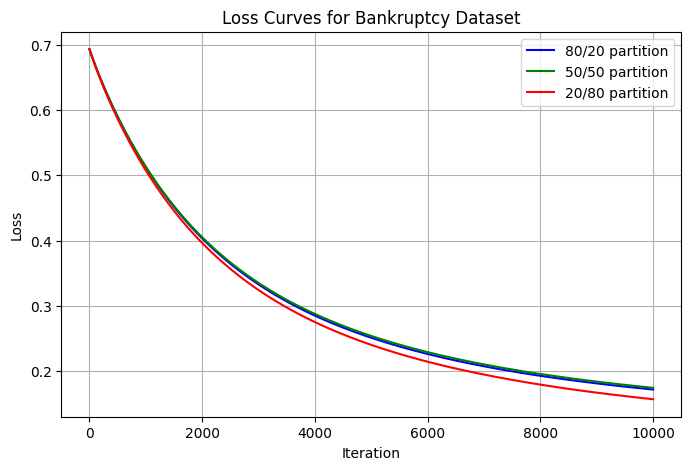

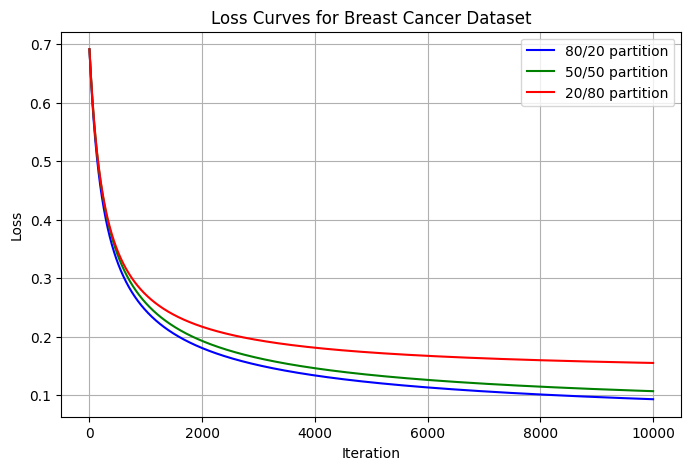

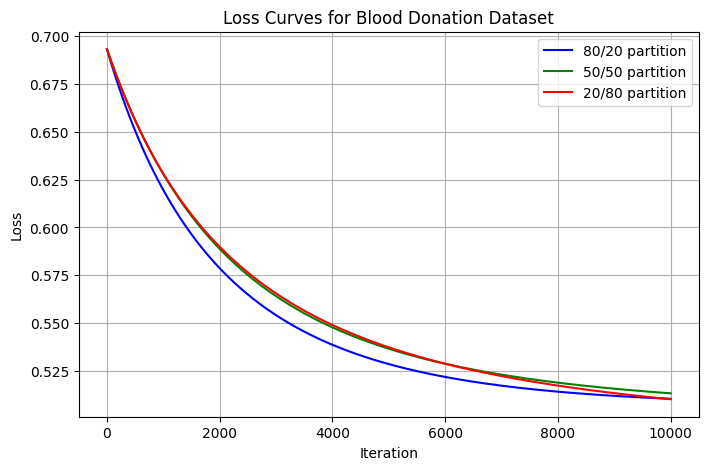

In [225]:
# Define partitions and colors
partitions = ['80/20', '50/50', '20/80']
colors = ['blue', 'green', 'red']

# Dataset loss curves dictionary
dataset_losses = {
    'Bankruptcy': {
        '80/20': best_losses_bank_80_log,
        '50/50': best_losses_bank_50_log,
        '20/80': best_losses_bank_20_log
    },
    'Breast Cancer': {
        '80/20': best_losses_cancer_80_log,
        '50/50': best_losses_cancer_50_log,
        '20/80': best_losses_cancer_20_log
    },
    'Blood Donation': {
        '80/20': best_losses_blood_80_log,
        '50/50': best_losses_blood_50_log,
        '20/80': best_losses_blood_20_log
    }
}

# Plotting
for dataset_name, losses_dict in dataset_losses.items():
    plt.figure(figsize=(8,5))
    for i, partition in enumerate(partitions):
        losses = losses_dict[partition]
        plt.plot(range(len(losses)), losses, color=colors[i], label=f'{partition} partition')
    plt.title(f'Loss Curves for {dataset_name} Dataset')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


#### __Classifier 2:__ Decision Tree

##### Decision tree components

Compute training and testing accuracy

In [226]:
# Compute train/test accuracy
def calc_dt_accuracy(X, y, model):
    y_pred = model.predict(X)
    return accuracy_score(y, y_pred)

Cross validation

In [227]:
# Perform K-fold cross-validation for a given hyperparameter combo
def cross_validate_dt(X, y, max_depth, min_samples_split=2, min_samples_leaf=1, K=5):
    kf = KFold(n_splits=K, shuffle=True)
    val_accs = []
    
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        clf = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=1
        )
        clf.fit(X_train, y_train)
        y_val_pred = clf.predict(X_val)
        val_acc = accuracy_score(y_val, y_val_pred)
        val_accs.append(val_acc)
    
    return val_accs, np.mean(val_accs)

Trial & Partition

In [228]:
# Run one trial of Decision Tree
def run_dt_trial(X, y, hyperparams, train_ratio):
    # Ensure numpy arrays
    X = X.values if hasattr(X, "values") else X
    y = y.values if hasattr(y, "values") else y

    # Shuffle
    idx = np.random.permutation(len(y))
    X, y = X[idx], y[idx]

    # Split
    split = int(train_ratio * len(y))
    X_train, y_train = X[:split], y[:split]
    X_test, y_test   = X[split:], y[split:]

    # Hyperparameter tuning via CV (accuracy-based)
    best_acc = -1
    best_params = None
    for hp in hyperparams:
        val_accs, val_mean = cross_validate_dt(
            X_train, y_train,
            max_depth=hp["max_depth"],
            min_samples_split=hp.get("min_samples_split", 2),
            min_samples_leaf=hp.get("min_samples_leaf", 1)
        )
        if val_mean > best_acc:
            best_acc = val_mean
            best_params = hp

    # Train final model on full training set with best hyperparams
    clf_final = DecisionTreeClassifier(
        max_depth=best_params["max_depth"],
        min_samples_split=best_params.get("min_samples_split", 2),
        min_samples_leaf=best_params.get("min_samples_leaf", 1),
        random_state=1
    )
    clf_final.fit(X_train, y_train)

    # Compute train/test accuracy
    train_acc = calc_dt_accuracy(X_train, y_train, clf_final)
    test_acc  = calc_dt_accuracy(X_test, y_test, clf_final)

    return train_acc, test_acc, best_params, best_acc, clf_final


# Run a partition of 3 trials
def run_dt_partition(X, y, hyperparams, train_ratio, n_trials=3):
    train_accs, test_accs = [], []
    best_params_list, best_cv_list = [], []

    best_test_acc = -1
    best_model = None

    for _ in range(n_trials):
        tr_acc, te_acc, best_params, best_cv, clf_final = run_dt_trial(X, y, hyperparams, train_ratio)
        train_accs.append(tr_acc)
        test_accs.append(te_acc)
        best_params_list.append(best_params)
        best_cv_list.append(best_cv)

        if te_acc > best_test_acc:  # higher accuracy is better
            best_test_acc = te_acc
            best_model = clf_final

    avg_train_acc = np.mean(train_accs)
    avg_test_acc  = np.mean(test_accs)
    avg_cv_acc    = np.mean(best_cv_list)

    return avg_train_acc, avg_test_acc, best_model, train_accs, test_accs, best_params_list, best_cv_list, avg_cv_acc

Define Hyperparameter Grid

In [229]:
hyperparams_tree = [
    {"max_depth": 3,  "min_samples_split": 2},
    {"max_depth": 5,  "min_samples_split": 2},
    {"max_depth": 7,  "min_samples_split": 2},
    {"max_depth": 3,  "min_samples_split": 5},
    {"max_depth": 5,  "min_samples_split": 5},
    {"max_depth": 7,  "min_samples_split": 5},
]

print("Decision Tree Hyperparameter Grid:")
for hp in hyperparams_tree:
    print(hp)

Decision Tree Hyperparameter Grid:
{'max_depth': 3, 'min_samples_split': 2}
{'max_depth': 5, 'min_samples_split': 2}
{'max_depth': 7, 'min_samples_split': 2}
{'max_depth': 3, 'min_samples_split': 5}
{'max_depth': 5, 'min_samples_split': 5}
{'max_depth': 7, 'min_samples_split': 5}


##### Decision tree 80/20 partition

Bankruptcy Dataset

In [230]:
# Define train/test split ratio
train_ratio_80 = 0.8

# Prepare hyperparameter list for Decision Tree
hyperparam_list = hyperparams_tree

# Run 3-trial 80/20 partition
avg_train_bank_80_dt, avg_test_bank_80_dt, best_model_bank_80_dt, train_accs_bank_80_dt, test_accs_bank_80_dt, \
best_hyperparams_list_bank_80_dt, best_cv_acc_list_bank_80_dt, avg_cv_acc_bank_80_dt = run_dt_partition(
    X_bank, y_bank,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_80
)

# Print results
print("===== Decision Tree: Bankruptcy Dataset (80/20 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_bank_80_dt:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_bank_80_dt:.4f}")
print("Individual trial Train Accuracies:", train_accs_bank_80_dt)
print("Individual trial Test Accuracies:", test_accs_bank_80_dt)
print("Best hyperparameters per trial :", best_hyperparams_list_bank_80_dt)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_bank_80_dt)
print(f"Average CV accuracy across trials: {avg_cv_acc_bank_80_dt:.4f}")
print("Best trial model stored in: best_model_bank_80_dt")

===== Decision Tree: Bankruptcy Dataset (80/20 Partition) =====
Average Training Accuracy (3 trials): 0.9735
Average Testing Accuracy  (3 trials): 0.9651
Individual trial Train Accuracies: [0.9730522456461962, 0.9725022914757103, 0.9748854262144822]
Individual trial Test Accuracies: [0.967008797653959, 0.967008797653959, 0.9611436950146628]
Best hyperparameters per trial : [{'max_depth': 3, 'min_samples_split': 2}, {'max_depth': 3, 'min_samples_split': 5}, {'max_depth': 3, 'min_samples_split': 5}]
CV accuracy of best hyperparameters per trial : [np.float64(0.9688359303391383), np.float64(0.9692025664527956), np.float64(0.9697525206232813)]
Average CV accuracy across trials: 0.9693
Best trial model stored in: best_model_bank_80_dt


Breast Cancer Dataset

In [231]:
# Define train/test split ratio
train_ratio_80 = 0.8

# Prepare hyperparameter list for Decision Tree
hyperparam_list = hyperparams_tree

# Run 3-trial 80/20 partition
avg_train_cancer_80_dt, avg_test_cancer_80_dt, best_model_cancer_80_dt, train_accs_cancer_80_dt, test_accs_cancer_80_dt, \
best_hyperparams_list_cancer_80_dt, best_cv_acc_list_cancer_80_dt, avg_cv_acc_cancer_80_dt = run_dt_partition(
    X_cancer, y_cancer,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_80
)

# Print results
print("===== Decision Tree: Breast Cancer Dataset (80/20 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_cancer_80_dt:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_cancer_80_dt:.4f}")
print("Individual trial Train Accuracies:", train_accs_cancer_80_dt)
print("Individual trial Test Accuracies:", test_accs_cancer_80_dt)
print("Best hyperparameters per trial :", best_hyperparams_list_cancer_80_dt)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_cancer_80_dt)
print(f"Average CV accuracy across trials: {avg_cv_acc_cancer_80_dt:.4f}")
print("Best trial model stored in: best_model_cancer_80_dt")

===== Decision Tree: Breast Cancer Dataset (80/20 Partition) =====
Average Training Accuracy (3 trials): 0.9839
Average Testing Accuracy  (3 trials): 0.9298
Individual trial Train Accuracies: [0.9978021978021978, 0.9802197802197802, 0.9736263736263736]
Individual trial Test Accuracies: [0.9210526315789473, 0.9473684210526315, 0.9210526315789473]
Best hyperparameters per trial : [{'max_depth': 7, 'min_samples_split': 5}, {'max_depth': 3, 'min_samples_split': 2}, {'max_depth': 3, 'min_samples_split': 2}]
CV accuracy of best hyperparameters per trial : [np.float64(0.9472527472527472), np.float64(0.9318681318681318), np.float64(0.9384615384615385)]
Average CV accuracy across trials: 0.9392
Best trial model stored in: best_model_cancer_80_dt


Blood Donation Dataset

In [232]:
# Define train/test split ratio
train_ratio_80 = 0.8

# Prepare hyperparameter list for Decision Tree
hyperparam_list = hyperparams_tree

# Run 3-trial 80/20 partition
avg_train_blood_80_dt, avg_test_blood_80_dt, best_model_blood_80_dt, train_accs_blood_80_dt, test_accs_blood_80_dt, \
best_hyperparams_list_blood_80_dt, best_cv_acc_list_blood_80_dt, avg_cv_acc_blood_80_dt = run_dt_partition(
    X_blood, y_blood,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_80
)

# Print results
print("===== Decision Tree: Blood Donation Dataset (80/20 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_blood_80_dt:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_blood_80_dt:.4f}")
print("Individual trial Train Accuracies:", train_accs_blood_80_dt)
print("Individual trial Test Accuracies:", test_accs_blood_80_dt)
print("Best hyperparameters per trial :", best_hyperparams_list_blood_80_dt)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_blood_80_dt)
print(f"Average CV accuracy across trials: {avg_cv_acc_blood_80_dt:.4f}")
print("Best trial model stored in: best_model_blood_80_dt")

===== Decision Tree: Blood Donation Dataset (80/20 Partition) =====
Average Training Accuracy (3 trials): 0.7977
Average Testing Accuracy  (3 trials): 0.7867
Individual trial Train Accuracies: [0.8160535117056856, 0.794314381270903, 0.782608695652174]
Individual trial Test Accuracies: [0.7866666666666666, 0.8, 0.7733333333333333]
Best hyperparameters per trial : [{'max_depth': 5, 'min_samples_split': 2}, {'max_depth': 3, 'min_samples_split': 2}, {'max_depth': 3, 'min_samples_split': 2}]
CV accuracy of best hyperparameters per trial : [np.float64(0.767549019607843), np.float64(0.7809243697478991), np.float64(0.7776050420168066)]
Average CV accuracy across trials: 0.7754
Best trial model stored in: best_model_blood_80_dt


##### Decision tree 50/50 partition

Bankruptcy Dataset

In [233]:
# Define train/test split ratio
train_ratio_50 = 0.5

# Prepare hyperparameter list for Decision Tree
hyperparam_list = hyperparams_tree

# Run 3-trial 50/50 partition
avg_train_bank_50_dt, avg_test_bank_50_dt, best_model_bank_50_dt, train_accs_bank_50_dt, test_accs_bank_50_dt, \
best_hyperparams_list_bank_50_dt, best_cv_acc_list_bank_50_dt, avg_cv_acc_bank_50_dt = run_dt_partition(
    X_bank, y_bank,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_50
)

# Print results
print("===== Decision Tree: Bankruptcy Dataset (50/50 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_bank_50_dt:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_bank_50_dt:.4f}")
print("Individual trial Train Accuracies:", train_accs_bank_50_dt)
print("Individual trial Test Accuracies:", test_accs_bank_50_dt)
print("Best hyperparameters per trial :", best_hyperparams_list_bank_50_dt)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_bank_50_dt)
print(f"Average CV accuracy across trials: {avg_cv_acc_bank_50_dt:.4f}")
print("Best trial model stored in: best_model_bank_50_dt")


===== Decision Tree: Bankruptcy Dataset (50/50 Partition) =====
Average Training Accuracy (3 trials): 0.9748
Average Testing Accuracy  (3 trials): 0.9643
Individual trial Train Accuracies: [0.9753593429158111, 0.9730126136696978, 0.9759460252273394]
Individual trial Test Accuracies: [0.966275659824047, 0.9653958944281525, 0.9612903225806452]
Best hyperparameters per trial : [{'max_depth': 3, 'min_samples_split': 2}, {'max_depth': 3, 'min_samples_split': 5}, {'max_depth': 3, 'min_samples_split': 2}]
CV accuracy of best hyperparameters per trial : [np.float64(0.9648003410544266), np.float64(0.9650953186834954), np.float64(0.9689054822776579)]
Average CV accuracy across trials: 0.9663
Best trial model stored in: best_model_bank_50_dt


Breast Cancer Dataset

In [234]:
# Define train/test split ratio
train_ratio_50 = 0.5

# Prepare hyperparameter list for Decision Tree
hyperparam_list = hyperparams_tree

# Run 3-trial 50/50 partition
avg_train_cancer_50_dt, avg_test_cancer_50_dt, best_model_cancer_50_dt, train_accs_cancer_50_dt, test_accs_cancer_50_dt, \
best_hyperparams_list_cancer_50_dt, best_cv_acc_list_cancer_50_dt, avg_cv_acc_cancer_50_dt = run_dt_partition(
    X_cancer, y_cancer,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_50
)

# Print results
print("===== Decision Tree: Breast Cancer Dataset (50/50 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_cancer_50_dt:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_cancer_50_dt:.4f}")
print("Individual trial Train Accuracies:", train_accs_cancer_50_dt)
print("Individual trial Test Accuracies:", test_accs_cancer_50_dt)
print("Best hyperparameters per trial :", best_hyperparams_list_cancer_50_dt)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_cancer_50_dt)
print(f"Average CV accuracy across trials: {avg_cv_acc_cancer_50_dt:.4f}")
print("Best trial model stored in: best_model_cancer_50_dt")

===== Decision Tree: Breast Cancer Dataset (50/50 Partition) =====
Average Training Accuracy (3 trials): 0.9941
Average Testing Accuracy  (3 trials): 0.9439
Individual trial Train Accuracies: [1.0, 0.9929577464788732, 0.9894366197183099]
Individual trial Test Accuracies: [0.9403508771929825, 0.9438596491228071, 0.9473684210526315]
Best hyperparameters per trial : [{'max_depth': 7, 'min_samples_split': 2}, {'max_depth': 7, 'min_samples_split': 5}, {'max_depth': 5, 'min_samples_split': 5}]
CV accuracy of best hyperparameters per trial : [np.float64(0.9507518796992482), np.float64(0.9400375939849624), np.float64(0.936591478696742)]
Average CV accuracy across trials: 0.9425
Best trial model stored in: best_model_cancer_50_dt


Blood Donation Dataset

In [235]:
# Define train/test split ratio
train_ratio_50 = 0.5

# Prepare hyperparameter list for Decision Tree
hyperparam_list = hyperparams_tree

# Run 3-trial 50/50 partition
avg_train_blood_50_dt, avg_test_blood_50_dt, best_model_blood_50_dt, train_accs_blood_50_dt, test_accs_blood_50_dt, \
best_hyperparams_list_blood_50_dt, best_cv_acc_list_blood_50_dt, avg_cv_acc_blood_50_dt = run_dt_partition(
    X_blood, y_blood,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_50
)

# Print results
print("===== Decision Tree: Blood Donation Dataset (50/50 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_blood_50_dt:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_blood_50_dt:.4f}")
print("Individual trial Train Accuracies:", train_accs_blood_50_dt)
print("Individual trial Test Accuracies:", test_accs_blood_50_dt)
print("Best hyperparameters per trial :", best_hyperparams_list_blood_50_dt)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_blood_50_dt)
print(f"Average CV accuracy across trials: {avg_cv_acc_blood_50_dt:.4f}")
print("Best trial model stored in: best_model_blood_50_dt")

===== Decision Tree: Blood Donation Dataset (50/50 Partition) =====
Average Training Accuracy (3 trials): 0.8173
Average Testing Accuracy  (3 trials): 0.7638
Individual trial Train Accuracies: [0.8315508021390374, 0.7914438502673797, 0.8288770053475936]
Individual trial Test Accuracies: [0.7459893048128342, 0.7887700534759359, 0.7566844919786097]
Best hyperparameters per trial : [{'max_depth': 5, 'min_samples_split': 2}, {'max_depth': 3, 'min_samples_split': 2}, {'max_depth': 5, 'min_samples_split': 2}]
CV accuracy of best hyperparameters per trial : [np.float64(0.7781261261261261), np.float64(0.7753153153153154), np.float64(0.7726846846846847)]
Average CV accuracy across trials: 0.7754
Best trial model stored in: best_model_blood_50_dt


##### Decision tree 20/80 partition

Bankruptcy Dataset

In [236]:
# Define train/test split ratio
train_ratio_20 = 0.2

# Prepare hyperparameter list for Decision Tree
hyperparam_list = hyperparams_tree

# Run 3-trial 20/80 partition
avg_train_bank_20_dt, avg_test_bank_20_dt, best_model_bank_20_dt, train_accs_bank_20_dt, test_accs_bank_20_dt, \
best_hyperparams_list_bank_20_dt, best_cv_acc_list_bank_20_dt, avg_cv_acc_bank_20_dt = run_dt_partition(
    X_bank, y_bank,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_20
)

# Print results
print("===== Decision Tree: Bankruptcy Dataset (20/80 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_bank_20_dt:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_bank_20_dt:.4f}")
print("Individual trial Train Accuracies:", train_accs_bank_20_dt)
print("Individual trial Test Accuracies:", test_accs_bank_20_dt)
print("Best hyperparameters per trial :", best_hyperparams_list_bank_20_dt)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_bank_20_dt)
print(f"Average CV accuracy across trials: {avg_cv_acc_bank_20_dt:.4f}")
print("Best trial model stored in: best_model_bank_20_dt")


===== Decision Tree: Bankruptcy Dataset (20/80 Partition) =====
Average Training Accuracy (3 trials): 0.9799
Average Testing Accuracy  (3 trials): 0.9630
Individual trial Train Accuracies: [0.9801907556859868, 0.9823917828319882, 0.9772560528246516]
Individual trial Test Accuracies: [0.9609604105571847, 0.9589442815249267, 0.969208211143695]
Best hyperparameters per trial : [{'max_depth': 3, 'min_samples_split': 2}, {'max_depth': 3, 'min_samples_split': 5}, {'max_depth': 3, 'min_samples_split': 5}]
CV accuracy of best hyperparameters per trial : [np.float64(0.9596369316957553), np.float64(0.9655058177117001), np.float64(0.9677170868347339)]
Average CV accuracy across trials: 0.9643
Best trial model stored in: best_model_bank_20_dt


Breast Cancer Dataset

In [237]:
# Define train/test split ratio
train_ratio_20 = 0.2

# Prepare hyperparameter list for Decision Tree
hyperparam_list = hyperparams_tree

# Run 3-trial 20/80 partition
avg_train_cancer_20_dt, avg_test_cancer_20_dt, best_model_cancer_20_dt, train_accs_cancer_20_dt, test_accs_cancer_20_dt, \
best_hyperparams_list_cancer_20_dt, best_cv_acc_list_cancer_20_dt, avg_cv_acc_cancer_20_dt = run_dt_partition(
    X_cancer, y_cancer,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_20
)

# Print results
print("===== Decision Tree: Breast Cancer Dataset (20/80 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_cancer_20_dt:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_cancer_20_dt:.4f}")
print("Individual trial Train Accuracies:", train_accs_cancer_20_dt)
print("Individual trial Test Accuracies:", test_accs_cancer_20_dt)
print("Best hyperparameters per trial :", best_hyperparams_list_cancer_20_dt)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_cancer_20_dt)
print(f"Average CV accuracy across trials: {avg_cv_acc_cancer_20_dt:.4f}")
print("Best trial model stored in: best_model_cancer_20_dt")

===== Decision Tree: Breast Cancer Dataset (20/80 Partition) =====
Average Training Accuracy (3 trials): 0.9971
Average Testing Accuracy  (3 trials): 0.9203
Individual trial Train Accuracies: [1.0, 1.0, 0.9911504424778761]
Individual trial Test Accuracies: [0.9144736842105263, 0.9298245614035088, 0.9166666666666666]
Best hyperparameters per trial : [{'max_depth': 7, 'min_samples_split': 2}, {'max_depth': 5, 'min_samples_split': 2}, {'max_depth': 3, 'min_samples_split': 5}]
CV accuracy of best hyperparameters per trial : [np.float64(0.9292490118577075), np.float64(0.8762845849802371), np.float64(0.9371541501976285)]
Average CV accuracy across trials: 0.9142
Best trial model stored in: best_model_cancer_20_dt


Blood Donation Dataset

In [238]:
# Define train/test split ratio
train_ratio_20 = 0.2

# Prepare hyperparameter list for Decision Tree
hyperparam_list = hyperparams_tree

# Run 3-trial 20/80 partition
avg_train_blood_20_dt, avg_test_blood_20_dt, best_model_blood_20_dt, train_accs_blood_20_dt, test_accs_blood_20_dt, \
best_hyperparams_list_blood_20_dt, best_cv_acc_list_blood_20_dt, avg_cv_acc_blood_20_dt = run_dt_partition(
    X_blood, y_blood,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_20
)

# Print results
print("===== Decision Tree: Blood Donation Dataset (20/80 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_blood_20_dt:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_blood_20_dt:.4f}")
print("Individual trial Train Accuracies:", train_accs_blood_20_dt)
print("Individual trial Test Accuracies:", test_accs_blood_20_dt)
print("Best hyperparameters per trial :", best_hyperparams_list_blood_20_dt)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_blood_20_dt)
print(f"Average CV accuracy across trials: {avg_cv_acc_blood_20_dt:.4f}")
print("Best trial model stored in: best_model_blood_20_dt")

===== Decision Tree: Blood Donation Dataset (20/80 Partition) =====
Average Training Accuracy (3 trials): 0.8434
Average Testing Accuracy  (3 trials): 0.7396
Individual trial Train Accuracies: [0.8120805369127517, 0.912751677852349, 0.8053691275167785]
Individual trial Test Accuracies: [0.7228714524207012, 0.7295492487479132, 0.7662771285475793]
Best hyperparameters per trial : [{'max_depth': 3, 'min_samples_split': 5}, {'max_depth': 7, 'min_samples_split': 2}, {'max_depth': 3, 'min_samples_split': 2}]
CV accuracy of best hyperparameters per trial : [np.float64(0.7705747126436782), np.float64(0.7314942528735632), np.float64(0.7995402298850575)]
Average CV accuracy across trials: 0.7672
Best trial model stored in: best_model_blood_20_dt


##### Data Summary

In [239]:
results_dt = {
    'bankruptcy': {
        '80/20': {
            'train_acc': avg_train_bank_80_dt,
            'test_acc' : avg_test_bank_80_dt,
            'best_hyperparams': best_hyperparams_list_bank_80_dt,
            'cv_acc': best_cv_acc_list_bank_80_dt,
            'best_model': best_model_bank_80_dt
        },
        '50/50': {
            'train_acc': avg_train_bank_50_dt,
            'test_acc' : avg_test_bank_50_dt,
            'best_hyperparams': best_hyperparams_list_bank_50_dt,
            'cv_acc': best_cv_acc_list_bank_50_dt,
            'best_model': best_model_bank_50_dt
        },
        '20/80': {
            'train_acc': avg_train_bank_20_dt,
            'test_acc' : avg_test_bank_20_dt,
            'best_hyperparams': best_hyperparams_list_bank_20_dt,
            'cv_acc': best_cv_acc_list_bank_20_dt,
            'best_model': best_model_bank_20_dt
        }
    },
    'breast cancer': {
        '80/20': {
            'train_acc': avg_train_cancer_80_dt,
            'test_acc' : avg_test_cancer_80_dt,
            'best_hyperparams': best_hyperparams_list_cancer_80_dt,
            'cv_acc': best_cv_acc_list_cancer_80_dt,
            'best_model': best_model_cancer_80_dt
        },
        '50/50': {
            'train_acc': avg_train_cancer_50_dt,
            'test_acc' : avg_test_cancer_50_dt,
            'best_hyperparams': best_hyperparams_list_cancer_50_dt,
            'cv_acc': best_cv_acc_list_cancer_50_dt,
            'best_model': best_model_cancer_50_dt
        },
        '20/80': {
            'train_acc': avg_train_cancer_20_dt,
            'test_acc' : avg_test_cancer_20_dt,
            'best_hyperparams': best_hyperparams_list_cancer_20_dt,
            'cv_acc': best_cv_acc_list_cancer_20_dt,
            'best_model': best_model_cancer_20_dt
        }
    },
    'blood donation': {
        '80/20': {
            'train_acc': avg_train_blood_80_dt,
            'test_acc' : avg_test_blood_80_dt,
            'best_hyperparams': best_hyperparams_list_blood_80_dt,
            'cv_acc': best_cv_acc_list_blood_80_dt,
            'best_model': best_model_blood_80_dt
        },
        '50/50': {
            'train_acc': avg_train_blood_50_dt,
            'test_acc' : avg_test_blood_50_dt,
            'best_hyperparams': best_hyperparams_list_blood_50_dt,
            'cv_acc': best_cv_acc_list_blood_50_dt,
            'best_model': best_model_blood_50_dt
        },
        '20/80': {
            'train_acc': avg_train_blood_20_dt,
            'test_acc' : avg_test_blood_20_dt,
            'best_hyperparams': best_hyperparams_list_blood_20_dt,
            'cv_acc': best_cv_acc_list_blood_20_dt,
            'best_model': best_model_blood_20_dt
        }
    }
}

# Print nicely formatted summary
for dataset, partitions in results_dt.items():
    print(f"===== Dataset: {dataset.upper()} =====")
    for part, metrics in partitions.items():
        print(f"Partition {part}:")
        print(f"  Avg Train Accuracy        : {metrics['train_acc']:.4f}")
        print(f"  Avg Test Accuracy         : {metrics['test_acc']:.4f}")
        print(f"  Best Hyperparams per Trial: {metrics['best_hyperparams']}")
        print(f"  CV Accuracy per Trial     : {metrics['cv_acc']}")
        print(f"  Best Model object stored  : {metrics['best_model']}")
    print("\n")

===== Dataset: BANKRUPTCY =====
Partition 80/20:
  Avg Train Accuracy        : 0.9735
  Avg Test Accuracy         : 0.9651
  Best Hyperparams per Trial: [{'max_depth': 3, 'min_samples_split': 2}, {'max_depth': 3, 'min_samples_split': 5}, {'max_depth': 3, 'min_samples_split': 5}]
  CV Accuracy per Trial     : [np.float64(0.9688359303391383), np.float64(0.9692025664527956), np.float64(0.9697525206232813)]
  Best Model object stored  : DecisionTreeClassifier(max_depth=3, random_state=1)
Partition 50/50:
  Avg Train Accuracy        : 0.9748
  Avg Test Accuracy         : 0.9643
  Best Hyperparams per Trial: [{'max_depth': 3, 'min_samples_split': 2}, {'max_depth': 3, 'min_samples_split': 5}, {'max_depth': 3, 'min_samples_split': 2}]
  CV Accuracy per Trial     : [np.float64(0.9648003410544266), np.float64(0.9650953186834954), np.float64(0.9689054822776579)]
  Best Model object stored  : DecisionTreeClassifier(max_depth=3, random_state=1)
Partition 20/80:
  Avg Train Accuracy        : 0.9799


#### __Classifier 3:__ Random Forest

##### Random Forest Components

General setup

In [240]:
random_state = 1                # ensure reproducibility
np.random.seed(random_state)

Define hyperparameter grid

In [241]:
# 7 hyperparameter combinations

hyperparams_rf = [
    {"n_estimators": 50,  "max_depth": 3,  "min_samples_split": 2},
    {"n_estimators": 50,  "max_depth": 5,  "min_samples_split": 2},
    
    {"n_estimators": 100, "max_depth": 3,  "min_samples_split": 2},
    {"n_estimators": 100, "max_depth": 5,  "min_samples_split": 2},
    {"n_estimators": 100, "max_depth": 7,  "min_samples_split": 2},

    {"n_estimators": 200, "max_depth": 5,  "min_samples_split": 2},
    {"n_estimators": 200, "max_depth": 7,  "min_samples_split": 2},
]

print("Random Forest Hyperparameter Grid:")
for hp in hyperparams_rf:
    print(hp)

Random Forest Hyperparameter Grid:
{'n_estimators': 50, 'max_depth': 3, 'min_samples_split': 2}
{'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 2}
{'n_estimators': 100, 'max_depth': 3, 'min_samples_split': 2}
{'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2}
{'n_estimators': 100, 'max_depth': 7, 'min_samples_split': 2}
{'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 2}
{'n_estimators': 200, 'max_depth': 7, 'min_samples_split': 2}


Cross validation

In [242]:
# Compute accuracy for train/test set
def calc_rf_accuracy(X, y, model):
    y_pred = model.predict(X)
    return accuracy_score(y, y_pred)

# Perform K-fold cross-validation using sklearn's cross_val_score
def cross_validate_rf(X, y, n_estimators, max_depth, min_samples_split=2, min_samples_leaf=1, K=5):
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=1
    )
    # Returns accuracy scores for each fold
    val_accs = cross_val_score(clf, X, y, cv=K, scoring='accuracy')
    return val_accs, np.mean(val_accs)

Trial & Partition

In [243]:
# Run one trial of Random Forest on a partition
def run_rf_trial(X, y, hyperparams, train_ratio):
    X = X.values if hasattr(X, "values") else X
    y = y.values if hasattr(y, "values") else y

    # Shuffle
    idx = np.random.permutation(len(y))
    X, y = X[idx], y[idx]

    # Split
    split = int(train_ratio * len(y))
    X_train, y_train = X[:split], y[:split]
    X_test, y_test   = X[split:], y[split:]

    # Hyperparameter tuning via CV (maximize accuracy)
    best_acc = -1
    best_params = None
    for hp in hyperparams:
        val_accs, val_mean = cross_validate_rf(
            X_train, y_train,
            n_estimators=hp["n_estimators"],
            max_depth=hp["max_depth"],
            min_samples_split=hp.get("min_samples_split", 2),
            min_samples_leaf=hp.get("min_samples_leaf", 1),
            K=5
        )
        if val_mean > best_acc:
            best_acc = val_mean
            best_params = hp

    # Train final model on full training set with best hyperparameters
    clf_final = RandomForestClassifier(
        n_estimators=best_params["n_estimators"],
        max_depth=best_params["max_depth"],
        min_samples_split=best_params.get("min_samples_split", 2),
        min_samples_leaf=best_params.get("min_samples_leaf", 1),
        random_state=1
    )
    clf_final.fit(X_train, y_train)

    # Compute train/test accuracy
    train_acc = calc_rf_accuracy(X_train, y_train, clf_final)
    test_acc  = calc_rf_accuracy(X_test, y_test, clf_final)

    return train_acc, test_acc, best_params, best_acc, clf_final


# Run a partition of multiple trials for Random Forest
def run_rf_partition(X, y, hyperparams, train_ratio, n_trials=3):
    train_accs, test_accs = [], []
    best_params_list, best_cv_list = [], []
    
    best_test_acc = -1
    best_model = None

    for _ in range(n_trials):
        tr_acc, te_acc, best_params, best_cv, clf_final = run_rf_trial(X, y, hyperparams, train_ratio)
        
        train_accs.append(tr_acc)
        test_accs.append(te_acc)
        best_params_list.append(best_params)
        best_cv_list.append(best_cv)

        # Keep model with highest test accuracy
        if te_acc > best_test_acc:
            best_test_acc = te_acc
            best_model = clf_final

    avg_train_acc = np.mean(train_accs)
    avg_test_acc  = np.mean(test_accs)
    avg_cv_acc    = np.mean(best_cv_list)

    return avg_train_acc, avg_test_acc, best_model, train_accs, test_accs, best_params_list, best_cv_list, avg_cv_acc


##### Random Forest 80/20 Partition

Bankruptcy Dataset

In [244]:
# Define train/test split ratio
train_ratio_80 = 0.8

# Prepare hyperparameter list for Random Forest
hyperparam_list = hyperparams_rf

# Run 3-trial 80/20 partition
avg_train_bank_80_rf, avg_test_bank_80_rf, best_model_bank_80_rf, train_accs_bank_80_rf, test_accs_bank_80_rf, \
best_hyperparams_list_bank_80_rf, best_cv_acc_list_bank_80_rf, avg_cv_acc_bank_80_rf = run_rf_partition(
    X_bank, y_bank,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_80,
    n_trials=3
)

# Print results
print("===== Random Forest: Bankruptcy Dataset (80/20 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_bank_80_rf:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_bank_80_rf:.4f}")
print("Individual trial Train Accuracies:", train_accs_bank_80_rf)
print("Individual trial Test Accuracies:", test_accs_bank_80_rf)
print("Best hyperparameters per trial :", best_hyperparams_list_bank_80_rf)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_bank_80_rf)
print(f"Average CV accuracy across trials: {avg_cv_acc_bank_80_rf:.4f}")
print("Best trial model stored in: best_model_bank_80_rf")

===== Random Forest: Bankruptcy Dataset (80/20 Partition) =====
Average Training Accuracy (3 trials): 0.9870
Average Testing Accuracy  (3 trials): 0.9685
Individual trial Train Accuracies: [0.9871677360219981, 0.9880843263061412, 0.9858845096241979]
Individual trial Test Accuracies: [0.969208211143695, 0.9655425219941349, 0.9706744868035191]
Best hyperparameters per trial : [{'n_estimators': 200, 'max_depth': 7, 'min_samples_split': 2}, {'n_estimators': 100, 'max_depth': 7, 'min_samples_split': 2}, {'n_estimators': 100, 'max_depth': 7, 'min_samples_split': 2}]
CV accuracy of best hyperparameters per trial : [np.float64(0.9695692025664527), np.float64(0.9715857011915674), np.float64(0.9706691109074244)]
Average CV accuracy across trials: 0.9706
Best trial model stored in: best_model_bank_80_rf


Breast Cancer Dataset

In [245]:
# Define train/test split ratio
train_ratio_80 = 0.8

# Prepare hyperparameter list for Random Forest
hyperparam_list = hyperparams_rf

# Run 3-trial 80/20 partition
avg_train_cancer_80_rf, avg_test_cancer_80_rf, best_model_cancer_80_rf, train_accs_cancer_80_rf, test_accs_cancer_80_rf, \
best_hyperparams_list_cancer_80_rf, best_cv_acc_list_cancer_80_rf, avg_cv_acc_cancer_80_rf = run_rf_partition(
    X_cancer, y_cancer,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_80,
    n_trials=3
)

# Print results
print("===== Random Forest: Breast Cancer Donation Dataset (80/20 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_cancer_80_rf:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_cancer_80_rf:.4f}")
print("Individual trial Train Accuracies:", train_accs_cancer_80_rf)
print("Individual trial Test Accuracies:", test_accs_cancer_80_rf)
print("Best hyperparameters per trial :", best_hyperparams_list_cancer_80_rf)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_cancer_80_rf)
print(f"Average CV accuracy across trials: {avg_cv_acc_cancer_80_rf:.4f}")
print("Best trial model stored in: best_model_cancer_80_rf")

===== Random Forest: Breast Cancer Donation Dataset (80/20 Partition) =====
Average Training Accuracy (3 trials): 0.9985
Average Testing Accuracy  (3 trials): 0.9649
Individual trial Train Accuracies: [1.0, 1.0, 0.9956043956043956]
Individual trial Test Accuracies: [0.9649122807017544, 0.9473684210526315, 0.9824561403508771]
Best hyperparameters per trial : [{'n_estimators': 100, 'max_depth': 7, 'min_samples_split': 2}, {'n_estimators': 100, 'max_depth': 7, 'min_samples_split': 2}, {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 2}]
CV accuracy of best hyperparameters per trial : [np.float64(0.9604395604395604), np.float64(0.9626373626373625), np.float64(0.9626373626373625)]
Average CV accuracy across trials: 0.9619
Best trial model stored in: best_model_cancer_80_rf


Blood Donation Dataset

In [246]:
# Define train/test split ratio
train_ratio_80 = 0.8

# Prepare hyperparameter list for Random Forest
hyperparam_list = hyperparams_rf

# Run 3-trial 80/20 partition
avg_train_blood_80_rf, avg_test_blood_80_rf, best_model_blood_80_rf, train_accs_blood_80_rf, test_accs_blood_80_rf, \
best_hyperparams_list_blood_80_rf, best_cv_acc_list_blood_80_rf, avg_cv_acc_blood_80_rf = run_rf_partition(
    X_blood, y_blood,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_80,
    n_trials=3
)

# Print results
print("===== Random Forest: Blood Donation Dataset (80/20 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_blood_80_rf:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_blood_80_rf:.4f}")
print("Individual trial Train Accuracies:", train_accs_blood_80_rf)
print("Individual trial Test Accuracies:", test_accs_blood_80_rf)
print("Best hyperparameters per trial :", best_hyperparams_list_blood_80_rf)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_blood_80_rf)
print(f"Average CV accuracy across trials: {avg_cv_acc_blood_80_rf:.4f}")
print("Best trial model stored in: best_model_blood_80_rf")


===== Random Forest: Blood Donation Dataset (80/20 Partition) =====
Average Training Accuracy (3 trials): 0.8127
Average Testing Accuracy  (3 trials): 0.7933
Individual trial Train Accuracies: [0.8210702341137124, 0.8277591973244147, 0.7892976588628763]
Individual trial Test Accuracies: [0.8533333333333334, 0.7866666666666666, 0.74]
Best hyperparameters per trial : [{'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 2}, {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2}, {'n_estimators': 100, 'max_depth': 3, 'min_samples_split': 2}]
CV accuracy of best hyperparameters per trial : [np.float64(0.7624789915966387), np.float64(0.7826750700280112), np.float64(0.7826190476190475)]
Average CV accuracy across trials: 0.7759
Best trial model stored in: best_model_blood_80_rf


##### Random Forest 50/50 Partition

Bankruptcy Dataset

In [247]:
# Define train/test split ratio
train_ratio_50 = 0.5

# Prepare hyperparameter list for Random Forest
hyperparam_list = hyperparams_rf

# Run 3-trial 50/50 partition
avg_train_bank_50_rf, avg_test_bank_50_rf, best_model_bank_50_rf, train_accs_bank_50_rf, test_accs_bank_50_rf, \
best_hyperparams_list_bank_50_rf, best_cv_acc_list_bank_50_rf, avg_cv_acc_bank_50_rf = run_rf_partition(
    X_bank, y_bank,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_50,
    n_trials=3
)

# Print results
print("===== Random Forest: Bankruptcy Dataset (50/50 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_bank_50_rf:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_bank_50_rf:.4f}")
print("Individual trial Train Accuracies:", train_accs_bank_50_rf)
print("Individual trial Test Accuracies:", test_accs_bank_50_rf)
print("Best hyperparameters per trial :", best_hyperparams_list_bank_50_rf)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_bank_50_rf)
print(f"Average CV accuracy across trials: {avg_cv_acc_bank_50_rf:.4f}")
print("Best trial model stored in: best_model_bank_50_rf")

===== Random Forest: Bankruptcy Dataset (50/50 Partition) =====
Average Training Accuracy (3 trials): 0.9826
Average Testing Accuracy  (3 trials): 0.9680
Individual trial Train Accuracies: [0.9818128483426225, 0.9882663537694338, 0.9777060721619243]
Individual trial Test Accuracies: [0.9665689149560117, 0.9680351906158358, 0.9695014662756598]
Best hyperparameters per trial : [{'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 2}, {'n_estimators': 200, 'max_depth': 7, 'min_samples_split': 2}, {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 2}]
CV accuracy of best hyperparameters per trial : [np.float64(0.9727186602417526), np.float64(0.970668027439379), np.float64(0.9694924231658636)]
Average CV accuracy across trials: 0.9710
Best trial model stored in: best_model_bank_50_rf


Breast Cancer Dataset

In [248]:
# Define train/test split ratio
train_ratio_50 = 0.5

# Prepare hyperparameter list for Random Forest
hyperparam_list = hyperparams_rf

# Run 3-trial 50/50 partition
avg_train_cancer_50_rf, avg_test_cancer_50_rf, best_model_cancer_50_rf, train_accs_cancer_50_rf, test_accs_cancer_50_rf, \
best_hyperparams_list_cancer_50_rf, best_cv_acc_list_cancer_50_rf, avg_cv_acc_cancer_50_rf = run_rf_partition(
    X_cancer, y_cancer,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_50,
    n_trials=3
)

# Print results
print("===== Random Forest: Breast Cancer Donation Dataset (50/50 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_cancer_50_rf:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_cancer_50_rf:.4f}")
print("Individual trial Train Accuracies:", train_accs_cancer_50_rf)
print("Individual trial Test Accuracies:", test_accs_cancer_50_rf)
print("Best hyperparameters per trial :", best_hyperparams_list_cancer_50_rf)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_cancer_50_rf)
print(f"Average CV accuracy across trials: {avg_cv_acc_cancer_50_rf:.4f}")
print("Best trial model stored in: best_model_cancer_50_rf")

===== Random Forest: Breast Cancer Donation Dataset (50/50 Partition) =====
Average Training Accuracy (3 trials): 0.9930
Average Testing Accuracy  (3 trials): 0.9556
Individual trial Train Accuracies: [0.9964788732394366, 0.9823943661971831, 1.0]
Individual trial Test Accuracies: [0.9368421052631579, 0.968421052631579, 0.9614035087719298]
Best hyperparameters per trial : [{'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 2}, {'n_estimators': 50, 'max_depth': 3, 'min_samples_split': 2}, {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 2}]
CV accuracy of best hyperparameters per trial : [np.float64(0.9611528822055139), np.float64(0.9402255639097744), np.float64(0.9541353383458647)]
Average CV accuracy across trials: 0.9518
Best trial model stored in: best_model_cancer_50_rf


Blood Donation Dataset

In [249]:
# Define train/test split ratio
train_ratio_50 = 0.5

# Prepare hyperparameter list for Random Forest
hyperparam_list = hyperparams_rf

# Run 3-trial 50/50 partition
avg_train_blood_50_rf, avg_test_blood_50_rf, best_model_blood_50_rf, train_accs_blood_50_rf, test_accs_blood_50_rf, \
best_hyperparams_list_blood_50_rf, best_cv_acc_list_blood_50_rf, avg_cv_acc_blood_50_rf = run_rf_partition(
    X_blood, y_blood,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_50,
    n_trials=3
)

# Print results
print("===== Random Forest: Blood Donation Dataset (50/50 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_blood_50_rf:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_blood_50_rf:.4f}")
print("Individual trial Train Accuracies:", train_accs_blood_50_rf)
print("Individual trial Test Accuracies:", test_accs_blood_50_rf)
print("Best hyperparameters per trial :", best_hyperparams_list_blood_50_rf)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_blood_50_rf)
print(f"Average CV accuracy across trials: {avg_cv_acc_blood_50_rf:.4f}")
print("Best trial model stored in: best_model_blood_50_rf")

===== Random Forest: Blood Donation Dataset (50/50 Partition) =====
Average Training Accuracy (3 trials): 0.8360
Average Testing Accuracy  (3 trials): 0.7807
Individual trial Train Accuracies: [0.8235294117647058, 0.8449197860962567, 0.839572192513369]
Individual trial Test Accuracies: [0.7967914438502673, 0.7647058823529411, 0.7807486631016043]
Best hyperparameters per trial : [{'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 2}, {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2}, {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 2}]
CV accuracy of best hyperparameters per trial : [np.float64(0.7727207207207207), np.float64(0.7994234234234234), np.float64(0.8022342342342343)]
Average CV accuracy across trials: 0.7915
Best trial model stored in: best_model_blood_50_rf


##### Random Forest 20/80 Partition

Bankrupcty Dataset

In [250]:
# Define train/test split ratio
train_ratio_20 = 0.2

# Prepare hyperparameter list for Random Forest
hyperparam_list = hyperparams_rf

# Run 3-trial 20/80 partition
avg_train_bank_20_rf, avg_test_bank_20_rf, best_model_bank_20_rf, train_accs_bank_20_rf, test_accs_bank_20_rf, \
best_hyperparams_list_bank_20_rf, best_cv_acc_list_bank_20_rf, avg_cv_acc_bank_20_rf = run_rf_partition(
    X_bank, y_bank,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_20,
    n_trials=3
)

# Print results
print("===== Random Forest: Bankruptcy Dataset (20/80 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_bank_20_rf:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_bank_20_rf:.4f}")
print("Individual trial Train Accuracies:", train_accs_bank_20_rf)
print("Individual trial Test Accuracies:", test_accs_bank_20_rf)
print("Best hyperparameters per trial :", best_hyperparams_list_bank_20_rf)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_bank_20_rf)
print(f"Average CV accuracy across trials: {avg_cv_acc_bank_20_rf:.4f}")
print("Best trial model stored in: best_model_bank_20_rf")

===== Random Forest: Bankruptcy Dataset (20/80 Partition) =====
Average Training Accuracy (3 trials): 0.9839
Average Testing Accuracy  (3 trials): 0.9681
Individual trial Train Accuracies: [0.9809244314013206, 0.9963316214233309, 0.9743213499633162]
Individual trial Test Accuracies: [0.969024926686217, 0.9671920821114369, 0.968108504398827]
Best hyperparameters per trial : [{'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 2}, {'n_estimators': 200, 'max_depth': 7, 'min_samples_split': 2}, {'n_estimators': 50, 'max_depth': 3, 'min_samples_split': 2}]
CV accuracy of best hyperparameters per trial : [np.float64(0.9684577677224736), np.float64(0.9757837750484809), np.float64(0.9669844861021332)]
Average CV accuracy across trials: 0.9704
Best trial model stored in: best_model_bank_20_rf


Breast Cancer Dataset

In [251]:
# Define train/test split ratio
train_ratio_20 = 0.2

# Prepare hyperparameter list for Random Forest
hyperparam_list = hyperparams_rf

# Run 3-trial 20/80 partition
avg_train_cancer_20_rf, avg_test_cancer_20_rf, best_model_cancer_20_rf, train_accs_cancer_20_rf, test_accs_cancer_20_rf, \
best_hyperparams_list_cancer_20_rf, best_cv_acc_list_cancer_20_rf, avg_cv_acc_cancer_20_rf = run_rf_partition(
    X_cancer, y_cancer,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_20,
    n_trials=3
)

# Print results
print("===== Random Forest: Breast Cancer Donation Dataset (20/80 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_cancer_20_rf:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_cancer_20_rf:.4f}")
print("Individual trial Train Accuracies:", train_accs_cancer_20_rf)
print("Individual trial Test Accuracies:", test_accs_cancer_20_rf)
print("Best hyperparameters per trial :", best_hyperparams_list_cancer_20_rf)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_cancer_20_rf)
print(f"Average CV accuracy across trials: {avg_cv_acc_cancer_20_rf:.4f}")
print("Best trial model stored in: best_model_cancer_20_rf")

===== Random Forest: Breast Cancer Donation Dataset (20/80 Partition) =====
Average Training Accuracy (3 trials): 1.0000
Average Testing Accuracy  (3 trials): 0.9386
Individual trial Train Accuracies: [1.0, 1.0, 1.0]
Individual trial Test Accuracies: [0.9254385964912281, 0.9429824561403509, 0.9473684210526315]
Best hyperparameters per trial : [{'n_estimators': 100, 'max_depth': 3, 'min_samples_split': 2}, {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 2}, {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 2}]
CV accuracy of best hyperparameters per trial : [np.float64(0.9727272727272727), np.float64(0.9470355731225297), np.float64(0.9375494071146244)]
Average CV accuracy across trials: 0.9524
Best trial model stored in: best_model_cancer_20_rf


Blood Donation Dataset

In [252]:
# Define train/test split ratio
train_ratio_20 = 0.2

# Prepare hyperparameter list for Random Forest
hyperparam_list = hyperparams_rf

# Run 3-trial 20/80 partition
avg_train_blood_20_rf, avg_test_blood_20_rf, best_model_blood_20_rf, train_accs_blood_20_rf, test_accs_blood_20_rf, \
best_hyperparams_list_blood_20_rf, best_cv_acc_list_blood_20_rf, avg_cv_acc_blood_20_rf = run_rf_partition(
    X_blood, y_blood,
    hyperparams=hyperparam_list,
    train_ratio=train_ratio_20,
    n_trials=3
)

# Print results
print("===== Random Forest: Blood Donation Dataset (20/80 Partition) =====")
print(f"Average Training Accuracy (3 trials): {avg_train_blood_20_rf:.4f}")
print(f"Average Testing Accuracy  (3 trials): {avg_test_blood_20_rf:.4f}")
print("Individual trial Train Accuracies:", train_accs_blood_20_rf)
print("Individual trial Test Accuracies:", test_accs_blood_20_rf)
print("Best hyperparameters per trial :", best_hyperparams_list_blood_20_rf)
print("CV accuracy of best hyperparameters per trial :", best_cv_acc_list_blood_20_rf)
print(f"Average CV accuracy across trials: {avg_cv_acc_blood_20_rf:.4f}")
print("Best trial model stored in: best_model_blood_20_rf")


===== Random Forest: Blood Donation Dataset (20/80 Partition) =====
Average Training Accuracy (3 trials): 0.8770
Average Testing Accuracy  (3 trials): 0.7657
Individual trial Train Accuracies: [0.8389261744966443, 0.959731543624161, 0.8322147651006712]
Individual trial Test Accuracies: [0.7579298831385642, 0.7729549248747913, 0.7662771285475793]
Best hyperparameters per trial : [{'n_estimators': 100, 'max_depth': 3, 'min_samples_split': 2}, {'n_estimators': 100, 'max_depth': 7, 'min_samples_split': 2}, {'n_estimators': 50, 'max_depth': 3, 'min_samples_split': 2}]
CV accuracy of best hyperparameters per trial : [np.float64(0.7781609195402299), np.float64(0.8457471264367816), np.float64(0.7721839080459769)]
Average CV accuracy across trials: 0.7987
Best trial model stored in: best_model_blood_20_rf


##### Data Summary

In [253]:
# Organize Random Forest results
results_rf = {
    'bankruptcy': {
        '80/20': {
            'train_acc': avg_train_bank_80_rf,
            'test_acc' : avg_test_bank_80_rf,
            'best_hyperparams': best_hyperparams_list_bank_80_rf,
            'cv_acc': best_cv_acc_list_bank_80_rf,
            'best_model': best_model_bank_80_rf
        },
        '50/50': {
            'train_acc': avg_train_bank_50_rf,
            'test_acc' : avg_test_bank_50_rf,
            'best_hyperparams': best_hyperparams_list_bank_50_rf,
            'cv_acc': best_cv_acc_list_bank_50_rf,
            'best_model': best_model_bank_50_rf
        },
        '20/80': {
            'train_acc': avg_train_bank_20_rf,
            'test_acc' : avg_test_bank_20_rf,
            'best_hyperparams': best_hyperparams_list_bank_20_rf,
            'cv_acc': best_cv_acc_list_bank_20_rf,
            'best_model': best_model_bank_20_rf
        }
    },

    'breast cancer': {
        '80/20': {
            'train_acc': avg_train_cancer_80_rf,
            'test_acc' : avg_test_cancer_80_rf,
            'best_hyperparams': best_hyperparams_list_cancer_80_rf,
            'cv_acc': best_cv_acc_list_cancer_80_rf,
            'best_model': best_model_cancer_80_rf
        },
        '50/50': {
            'train_acc': avg_train_cancer_50_rf,
            'test_acc' : avg_test_cancer_50_rf,
            'best_hyperparams': best_hyperparams_list_cancer_50_rf,
            'cv_acc': best_cv_acc_list_cancer_50_rf,
            'best_model': best_model_cancer_50_rf
        },
        '20/80': {
            'train_acc': avg_train_cancer_20_rf,
            'test_acc' : avg_test_cancer_20_rf,
            'best_hyperparams': best_hyperparams_list_cancer_20_rf,
            'cv_acc': best_cv_acc_list_cancer_20_rf,
            'best_model': best_model_cancer_20_rf
        }
    },

    'blood donation': {
        '80/20': {
            'train_acc': avg_train_blood_80_rf,
            'test_acc' : avg_test_blood_80_rf,
            'best_hyperparams': best_hyperparams_list_blood_80_rf,
            'cv_acc': best_cv_acc_list_blood_80_rf,
            'best_model': best_model_blood_80_rf
        },
        '50/50': {
            'train_acc': avg_train_blood_50_rf,
            'test_acc' : avg_test_blood_50_rf,
            'best_hyperparams': best_hyperparams_list_blood_50_rf,
            'cv_acc': best_cv_acc_list_blood_50_rf,
            'best_model': best_model_blood_50_rf
        },
        '20/80': {
            'train_acc': avg_train_blood_20_rf,
            'test_acc' : avg_test_blood_20_rf,
            'best_hyperparams': best_hyperparams_list_blood_20_rf,
            'cv_acc': best_cv_acc_list_blood_20_rf,
            'best_model': best_model_blood_20_rf
        }
    }
}

# Printout format
for dataset, partitions in results_rf.items():
    print(f"===== Dataset: {dataset.upper()} =====")
    for part, metrics in partitions.items():
        print(f"Partition {part}:")
        print(f"  Avg Train Accuracy        : {metrics['train_acc']:.4f}")
        print(f"  Avg Test Accuracy         : {metrics['test_acc']:.4f}")
        print(f"  Best Hyperparams per Trial: {metrics['best_hyperparams']}")
        print(f"  CV Accuracy per Trial     : {metrics['cv_acc']}")
        print(f"  Best Model object stored  : {metrics['best_model']}")
    print("\n")

===== Dataset: BANKRUPTCY =====
Partition 80/20:
  Avg Train Accuracy        : 0.9870
  Avg Test Accuracy         : 0.9685
  Best Hyperparams per Trial: [{'n_estimators': 200, 'max_depth': 7, 'min_samples_split': 2}, {'n_estimators': 100, 'max_depth': 7, 'min_samples_split': 2}, {'n_estimators': 100, 'max_depth': 7, 'min_samples_split': 2}]
  CV Accuracy per Trial     : [np.float64(0.9695692025664527), np.float64(0.9715857011915674), np.float64(0.9706691109074244)]
  Best Model object stored  : RandomForestClassifier(max_depth=7, random_state=1)
Partition 50/50:
  Avg Train Accuracy        : 0.9826
  Avg Test Accuracy         : 0.9680
  Best Hyperparams per Trial: [{'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 2}, {'n_estimators': 200, 'max_depth': 7, 'min_samples_split': 2}, {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 2}]
  CV Accuracy per Trial     : [np.float64(0.9727186602417526), np.float64(0.970668027439379), np.float64(0.9694924231658636)]
  Best Mode

#### __Data Summary Tables__  
Classifier x Dataset x Partition

Summary table helper function

In [254]:
# Produces one row of the summary table for a dataset × partition.

def make_summary_row(dataset_name, partition_name,
                      train_accs, test_accs,
                      cv_accs, best_hyperparams):

    return {
        "Dataset": dataset_name,
        "Partition": partition_name,
        "Train Acc Trial 1": train_accs[0],
        "Train Acc Trial 2": train_accs[1],
        "Train Acc Trial 3": train_accs[2],
        "Test Acc Trial 1": test_accs[0],
        "Test Acc Trial 2": test_accs[1],
        "Test Acc Trial 3": test_accs[2],
        "CV Acc Trial 1": cv_accs[0],
        "CV Acc Trial 2": cv_accs[1],
        "CV Acc Trial 3": cv_accs[2],
        "Best Hyperparam T1": best_hyperparams[0],
        "Best Hyperparam T2": best_hyperparams[1],
        "Best Hyperparam T3": best_hyperparams[2],
        "Avg Train Acc": np.mean(train_accs),
        "Avg Test Acc": np.mean(test_accs),
        "Avg CV Acc": np.mean(cv_accs)
    }

# Generate rows for one model
def build_model_summary(
    train_accs_bank_80, test_accs_bank_80, best_cv_acc_list_bank_80, best_hyperparams_list_bank_80,
    train_accs_bank_50, test_accs_bank_50, best_cv_acc_list_bank_50, best_hyperparams_list_bank_50,
    train_accs_bank_20, test_accs_bank_20, best_cv_acc_list_bank_20, best_hyperparams_list_bank_20,

    train_accs_cancer_80, test_accs_cancer_80, best_cv_acc_list_cancer_80, best_hyperparams_list_cancer_80,
    train_accs_cancer_50, test_accs_cancer_50, best_cv_acc_list_cancer_50, best_hyperparams_list_cancer_50,
    train_accs_cancer_20, test_accs_cancer_20, best_cv_acc_list_cancer_20, best_hyperparams_list_cancer_20,

    train_accs_blood_80, test_accs_blood_80, best_cv_acc_list_blood_80, best_hyperparams_list_blood_80,
    train_accs_blood_50, test_accs_blood_50, best_cv_acc_list_blood_50, best_hyperparams_list_blood_50,
    train_accs_blood_20, test_accs_blood_20, best_cv_acc_list_blood_20, best_hyperparams_list_blood_20,
):
    rows = []

    # Bankruptcy
    rows.append(make_summary_row("Bankruptcy", "80/20",
                                 train_accs_bank_80, test_accs_bank_80,
                                 best_cv_acc_list_bank_80, best_hyperparams_list_bank_80))
    rows.append(make_summary_row("Bankruptcy", "50/50",
                                 train_accs_bank_50, test_accs_bank_50,
                                 best_cv_acc_list_bank_50, best_hyperparams_list_bank_50))
    rows.append(make_summary_row("Bankruptcy", "20/80",
                                 train_accs_bank_20, test_accs_bank_20,
                                 best_cv_acc_list_bank_20, best_hyperparams_list_bank_20))

    # Breast Cancer
    rows.append(make_summary_row("Breast Cancer", "80/20",
                                 train_accs_cancer_80, test_accs_cancer_80,
                                 best_cv_acc_list_cancer_80, best_hyperparams_list_cancer_80))
    rows.append(make_summary_row("Breast Cancer", "50/50",
                                 train_accs_cancer_50, test_accs_cancer_50,
                                 best_cv_acc_list_cancer_50, best_hyperparams_list_cancer_50))
    rows.append(make_summary_row("Breast Cancer", "20/80",
                                 train_accs_cancer_20, test_accs_cancer_20,
                                 best_cv_acc_list_cancer_20, best_hyperparams_list_cancer_20))

    # Blood Donation
    rows.append(make_summary_row("Blood Donation", "80/20",
                                 train_accs_blood_80, test_accs_blood_80,
                                 best_cv_acc_list_blood_80, best_hyperparams_list_blood_80))
    rows.append(make_summary_row("Blood Donation", "50/50",
                                 train_accs_blood_50, test_accs_blood_50,
                                 best_cv_acc_list_blood_50, best_hyperparams_list_blood_50))
    rows.append(make_summary_row("Blood Donation", "20/80",
                                 train_accs_blood_20, test_accs_blood_20,
                                 best_cv_acc_list_blood_20, best_hyperparams_list_blood_20))

    return pd.DataFrame(rows)

__Table 1.1:__ Logistic regression summary table

In [255]:
log_summary = build_model_summary(
    # Bankruptcy
    train_accs_bank_80_log, test_accs_bank_80_log, best_cv_acc_list_bank_80_log, best_hyperparams_list_bank_80_log,
    train_accs_bank_50_log, test_accs_bank_50_log, best_cv_acc_list_bank_50_log, best_hyperparams_list_bank_50_log,
    train_accs_bank_20_log, test_accs_bank_20_log, best_cv_acc_list_bank_20_log, best_hyperparams_list_bank_20_log,

    # Breast Cancer
    train_accs_cancer_80_log, test_accs_cancer_80_log, best_cv_acc_list_cancer_80_log, best_hyperparams_list_cancer_80_log,
    train_accs_cancer_50_log, test_accs_cancer_50_log, best_cv_acc_list_cancer_50_log, best_hyperparams_list_cancer_50_log,
    train_accs_cancer_20_log, test_accs_cancer_20_log, best_cv_acc_list_cancer_20_log, best_hyperparams_list_cancer_20_log,

    # Blood Donation
    train_accs_blood_80_log, test_accs_blood_80_log, best_cv_acc_list_blood_80_log, best_hyperparams_list_blood_80_log,
    train_accs_blood_50_log, test_accs_blood_50_log, best_cv_acc_list_blood_50_log, best_hyperparams_list_blood_50_log,
    train_accs_blood_20_log, test_accs_blood_20_log, best_cv_acc_list_blood_20_log, best_hyperparams_list_blood_20_log,
)

display(log_summary)

,Dataset,Partition,Train Acc Trial 1,Train Acc Trial 2,Train Acc Trial 3,Test Acc Trial 1,Test Acc Trial 2,Test Acc Trial 3,CV Acc Trial 1,CV Acc Trial 2,CV Acc Trial 3,Best Hyperparam T1,Best Hyperparam T2,Best Hyperparam T3,Avg Train Acc,Avg Test Acc,Avg CV Acc
0,Bankruptcy,80/20,0.970669,0.970852,0.971402,0.964809,0.961877,0.962610,0.969569,0.969753,0.969569,"(0.001, 0.1)","(0.001, 0.1)","(0.001, 0.001)",0.970975,0.963099,0.969630
1,Bankruptcy,50/50,0.967732,0.971839,0.967146,0.970674,0.967155,0.970674,0.965973,0.968907,0.965386,"(0.001, 0.001)","(0.001, 0.1)","(0.001, 0.1)",0.968906,0.969501,0.966755
2,Bankruptcy,20/80,0.973588,0.976522,0.967718,0.964260,0.964626,0.964076,0.968450,0.969185,0.963305,"(0.001, 0.1)","(0.001, 0.01)","(0.001, 0.01)",0.972609,0.964321,0.966980
3,Breast Cancer,80/20,0.986813,0.978022,0.982418,0.964912,0.964912,0.956140,0.980220,0.975824,0.984615,"(0.001, 0.001)","(0.001, 0.001)","(0.001, 0.001)",0.982418,0.961988,0.980220
4,Breast Cancer,50/50,0.982394,0.978873,0.975352,0.975439,0.971930,0.982456,0.978885,0.978947,0.975251,"(0.001, 0.01)","(0.001, 0.01)","(0.001, 0.001)",0.978873,0.976608,0.977694
5,Breast Cancer,20/80,1.000000,0.973451,0.991150,0.964912,0.978070,0.969298,0.990909,0.938735,0.973913,"(0.001, 0.01)","(0.001, 0.01)","(0.001, 0.01)",0.988201,0.970760,0.967852
6,Blood Donation,80/20,0.765886,0.782609,0.777592,0.793333,0.753333,0.780000,0.769174,0.782745,0.777633,"(0.001, 0.1)","(0.001, 0.001)","(0.001, 0.01)",0.775362,0.775556,0.776517
7,Blood Donation,50/50,0.786096,0.754011,0.748663,0.764706,0.796791,0.788770,0.788937,0.751207,0.756468,"(0.001, 0.01)","(0.001, 0.01)","(0.001, 0.01)",0.762923,0.783422,0.765538
8,Blood Donation,20/80,0.758389,0.744966,0.731544,0.789649,0.782972,0.774624,0.764828,0.745517,0.724368,"(0.001, 0.001)","(0.001, 0.01)","(0.001, 0.01)",0.744966,0.782415,0.744904


__Table 1.2:__ Decision tree summary table

In [256]:
dt_summary = build_model_summary(
    # Bankruptcy
    train_accs_bank_80_dt, test_accs_bank_80_dt, best_cv_acc_list_bank_80_dt, best_hyperparams_list_bank_80_dt,
    train_accs_bank_50_dt, test_accs_bank_50_dt, best_cv_acc_list_bank_50_dt, best_hyperparams_list_bank_50_dt,
    train_accs_bank_20_dt, test_accs_bank_20_dt, best_cv_acc_list_bank_20_dt, best_hyperparams_list_bank_20_dt,

    # Breast Cancer
    train_accs_cancer_80_dt, test_accs_cancer_80_dt, best_cv_acc_list_cancer_80_dt, best_hyperparams_list_cancer_80_dt,
    train_accs_cancer_50_dt, test_accs_cancer_50_dt, best_cv_acc_list_cancer_50_dt, best_hyperparams_list_cancer_50_dt,
    train_accs_cancer_20_dt, test_accs_cancer_20_dt, best_cv_acc_list_cancer_20_dt, best_hyperparams_list_cancer_20_dt,

    # Blood Donation
    train_accs_blood_80_dt, test_accs_blood_80_dt, best_cv_acc_list_blood_80_dt, best_hyperparams_list_blood_80_dt,
    train_accs_blood_50_dt, test_accs_blood_50_dt, best_cv_acc_list_blood_50_dt, best_hyperparams_list_blood_50_dt,
    train_accs_blood_20_dt, test_accs_blood_20_dt, best_cv_acc_list_blood_20_dt, best_hyperparams_list_blood_20_dt,
)

display(dt_summary)

,Dataset,Partition,Train Acc Trial 1,Train Acc Trial 2,Train Acc Trial 3,Test Acc Trial 1,Test Acc Trial 2,Test Acc Trial 3,CV Acc Trial 1,CV Acc Trial 2,CV Acc Trial 3,Best Hyperparam T1,Best Hyperparam T2,Best Hyperparam T3,Avg Train Acc,Avg Test Acc,Avg CV Acc
0,Bankruptcy,80/20,0.973052,0.972502,0.974885,0.967009,0.967009,0.961144,0.968836,0.969203,0.969753,"{'max_depth': 3, 'min_samples_split': 2}","{'max_depth': 3, 'min_samples_split': 5}","{'max_depth': 3, 'min_samples_split': 5}",0.973480,0.965054,0.969264
1,Bankruptcy,50/50,0.975359,0.973013,0.975946,0.966276,0.965396,0.961290,0.964800,0.965095,0.968905,"{'max_depth': 3, 'min_samples_split': 2}","{'max_depth': 3, 'min_samples_split': 5}","{'max_depth': 3, 'min_samples_split': 2}",0.974773,0.964321,0.966267
2,Bankruptcy,20/80,0.980191,0.982392,0.977256,0.960960,0.958944,0.969208,0.959637,0.965506,0.967717,"{'max_depth': 3, 'min_samples_split': 2}","{'max_depth': 3, 'min_samples_split': 5}","{'max_depth': 3, 'min_samples_split': 5}",0.979946,0.963038,0.964287
3,Breast Cancer,80/20,0.997802,0.980220,0.973626,0.921053,0.947368,0.921053,0.947253,0.931868,0.938462,"{'max_depth': 7, 'min_samples_split': 5}","{'max_depth': 3, 'min_samples_split': 2}","{'max_depth': 3, 'min_samples_split': 2}",0.983883,0.929825,0.939194
4,Breast Cancer,50/50,1.000000,0.992958,0.989437,0.940351,0.943860,0.947368,0.950752,0.940038,0.936591,"{'max_depth': 7, 'min_samples_split': 2}","{'max_depth': 7, 'min_samples_split': 5}","{'max_depth': 5, 'min_samples_split': 5}",0.994131,0.943860,0.942460
5,Breast Cancer,20/80,1.000000,1.000000,0.991150,0.914474,0.929825,0.916667,0.929249,0.876285,0.937154,"{'max_depth': 7, 'min_samples_split': 2}","{'max_depth': 5, 'min_samples_split': 2}","{'max_depth': 3, 'min_samples_split': 5}",0.997050,0.920322,0.914229
6,Blood Donation,80/20,0.816054,0.794314,0.782609,0.786667,0.800000,0.773333,0.767549,0.780924,0.777605,"{'max_depth': 5, 'min_samples_split': 2}","{'max_depth': 3, 'min_samples_split': 2}","{'max_depth': 3, 'min_samples_split': 2}",0.797659,0.786667,0.775359
7,Blood Donation,50/50,0.831551,0.791444,0.828877,0.745989,0.788770,0.756684,0.778126,0.775315,0.772685,"{'max_depth': 5, 'min_samples_split': 2}","{'max_depth': 3, 'min_samples_split': 2}","{'max_depth': 5, 'min_samples_split': 2}",0.817291,0.763815,0.775375
8,Blood Donation,20/80,0.812081,0.912752,0.805369,0.722871,0.729549,0.766277,0.770575,0.731494,0.799540,"{'max_depth': 3, 'min_samples_split': 5}","{'max_depth': 7, 'min_samples_split': 2}","{'max_depth': 3, 'min_samples_split': 2}",0.843400,0.739566,0.767203


__Table 1.3:__ Random forest summary table

In [257]:
rf_summary = build_model_summary(
    # Bankruptcy
    train_accs_bank_80_rf, test_accs_bank_80_rf, best_cv_acc_list_bank_80_rf, best_hyperparams_list_bank_80_rf,
    train_accs_bank_50_rf, test_accs_bank_50_rf, best_cv_acc_list_bank_50_rf, best_hyperparams_list_bank_50_rf,
    train_accs_bank_20_rf, test_accs_bank_20_rf, best_cv_acc_list_bank_20_rf, best_hyperparams_list_bank_20_rf,

    # Breast Cancer
    train_accs_cancer_80_rf, test_accs_cancer_80_rf, best_cv_acc_list_cancer_80_rf, best_hyperparams_list_cancer_80_rf,
    train_accs_cancer_50_rf, test_accs_cancer_50_rf, best_cv_acc_list_cancer_50_rf, best_hyperparams_list_cancer_50_rf,
    train_accs_cancer_20_rf, test_accs_cancer_20_rf, best_cv_acc_list_cancer_20_rf, best_hyperparams_list_cancer_20_rf,

    # Blood Donation
    train_accs_blood_80_rf, test_accs_blood_80_rf, best_cv_acc_list_blood_80_rf, best_hyperparams_list_blood_80_rf,
    train_accs_blood_50_rf, test_accs_blood_50_rf, best_cv_acc_list_blood_50_rf, best_hyperparams_list_blood_50_rf,
    train_accs_blood_20_rf, test_accs_blood_20_rf, best_cv_acc_list_blood_20_rf, best_hyperparams_list_blood_20_rf,
)

display(rf_summary)

,Dataset,Partition,Train Acc Trial 1,Train Acc Trial 2,Train Acc Trial 3,Test Acc Trial 1,Test Acc Trial 2,Test Acc Trial 3,CV Acc Trial 1,CV Acc Trial 2,CV Acc Trial 3,Best Hyperparam T1,Best Hyperparam T2,Best Hyperparam T3,Avg Train Acc,Avg Test Acc,Avg CV Acc
0,Bankruptcy,80/20,0.987168,0.988084,0.985885,0.969208,0.965543,0.970674,0.969569,0.971586,0.970669,"{'n_estimators': 200, 'max_depth': 7, 'min_sam...","{'n_estimators': 100, 'max_depth': 7, 'min_sam...","{'n_estimators': 100, 'max_depth': 7, 'min_sam...",0.987046,0.968475,0.970608
1,Bankruptcy,50/50,0.981813,0.988266,0.977706,0.966569,0.968035,0.969501,0.972719,0.970668,0.969492,"{'n_estimators': 200, 'max_depth': 5, 'min_sam...","{'n_estimators': 200, 'max_depth': 7, 'min_sam...","{'n_estimators': 200, 'max_depth': 5, 'min_sam...",0.982595,0.968035,0.970960
2,Bankruptcy,20/80,0.980924,0.996332,0.974321,0.969025,0.967192,0.968109,0.968458,0.975784,0.966984,"{'n_estimators': 200, 'max_depth': 5, 'min_sam...","{'n_estimators': 200, 'max_depth': 7, 'min_sam...","{'n_estimators': 50, 'max_depth': 3, 'min_samp...",0.983859,0.968109,0.970409
3,Breast Cancer,80/20,1.000000,1.000000,0.995604,0.964912,0.947368,0.982456,0.960440,0.962637,0.962637,"{'n_estimators': 100, 'max_depth': 7, 'min_sam...","{'n_estimators': 100, 'max_depth': 7, 'min_sam...","{'n_estimators': 50, 'max_depth': 5, 'min_samp...",0.998535,0.964912,0.961905
4,Breast Cancer,50/50,0.996479,0.982394,1.000000,0.936842,0.968421,0.961404,0.961153,0.940226,0.954135,"{'n_estimators': 50, 'max_depth': 5, 'min_samp...","{'n_estimators': 50, 'max_depth': 3, 'min_samp...","{'n_estimators': 50, 'max_depth': 5, 'min_samp...",0.992958,0.955556,0.951838
5,Breast Cancer,20/80,1.000000,1.000000,1.000000,0.925439,0.942982,0.947368,0.972727,0.947036,0.937549,"{'n_estimators': 100, 'max_depth': 3, 'min_sam...","{'n_estimators': 50, 'max_depth': 5, 'min_samp...","{'n_estimators': 200, 'max_depth': 5, 'min_sam...",1.000000,0.938596,0.952437
6,Blood Donation,80/20,0.821070,0.827759,0.789298,0.853333,0.786667,0.740000,0.762479,0.782675,0.782619,"{'n_estimators': 50, 'max_depth': 5, 'min_samp...","{'n_estimators': 100, 'max_depth': 5, 'min_sam...","{'n_estimators': 100, 'max_depth': 3, 'min_sam...",0.812709,0.793333,0.775924
7,Blood Donation,50/50,0.823529,0.844920,0.839572,0.796791,0.764706,0.780749,0.772721,0.799423,0.802234,"{'n_estimators': 50, 'max_depth': 5, 'min_samp...","{'n_estimators': 100, 'max_depth': 5, 'min_sam...","{'n_estimators': 200, 'max_depth': 5, 'min_sam...",0.836007,0.780749,0.791459
8,Blood Donation,20/80,0.838926,0.959732,0.832215,0.757930,0.772955,0.766277,0.778161,0.845747,0.772184,"{'n_estimators': 100, 'max_depth': 3, 'min_sam...","{'n_estimators': 100, 'max_depth': 7, 'min_sam...","{'n_estimators': 50, 'max_depth': 3, 'min_samp...",0.876957,0.765721,0.798697


#### __Classifier Accuracy Comparison Per Dataset/Partition__
Compare different algorithms for each dataset on each partition.

##### Comparison tables

Functions to build one comparison table

In [279]:
# Helper function: one row for classifier × partition
def make_comparison_row(dataset, ratio, clf):
    avg_train = globals()[f"avg_train_{dataset}_{ratio}_{clf}"]
    avg_test = globals()[f"avg_test_{dataset}_{ratio}_{clf}"]
    avg_cv = globals()[f"avg_cv_acc_{dataset}_{ratio}_{clf}"]
    best_hp = globals()[f"best_hyperparams_list_{dataset}_{ratio}_{clf}"]

    ratio_label = {"80": "80/20", "50": "50/50", "20": "20/80"}[ratio]

    return {
        "Classifier": clf.upper(),
        "Partition": ratio_label,
        "Avg Train Acc": avg_train,
        "Avg Test Acc": avg_test,
        "Avg CV Acc": avg_cv,
        "Best Hyperparams": best_hp
    }

# Build table per dataset and tag best classifier per partition
def build_dataset_table(dataset):
    classifiers = ["log", "dt", "rf"]
    ratios = ["80", "50", "20"]

    rows = []
    for r in ratios:
        for clf in classifiers:
            rows.append(make_comparison_row(dataset, r, clf))

    df = pd.DataFrame(rows)

    # Add best classifier column (highest Avg Test Acc per partition)
    df["Best classifier"] = ""
    for part in df["Partition"].unique():
        mask = df["Partition"] == part
        best_idx = df.loc[mask, "Avg Test Acc"].idxmax()
        df.loc[best_idx, "Best classifier"] = "BEST"

    return df

__Table 2.1:__ Bankruptcy Dataset: Classifier Comparison

In [280]:
table2_1_bankruptcy = build_dataset_table("bank")

print("Table 2.1: Bankruptcy — Classifier Comparison")
display(table2_1_bankruptcy)

Table 2.1: Bankruptcy — Classifier Comparison


,Classifier,Partition,Avg Train Acc,Avg Test Acc,Avg CV Acc,Best Hyperparams,Best classifier
0,LOG,80/20,0.970975,0.963099,0.969630,"[(0.001, 0.1), (0.001, 0.1), (0.001, 0.001)]",
1,DT,80/20,0.973480,0.965054,0.969264,"[{'max_depth': 3, 'min_samples_split': 2}, {'m...",
2,RF,80/20,0.987046,0.968475,0.970608,"[{'n_estimators': 200, 'max_depth': 7, 'min_sa...",BEST
3,LOG,50/50,0.968906,0.969501,0.966755,"[(0.001, 0.001), (0.001, 0.1), (0.001, 0.1)]",BEST
4,DT,50/50,0.974773,0.964321,0.966267,"[{'max_depth': 3, 'min_samples_split': 2}, {'m...",
5,RF,50/50,0.982595,0.968035,0.970960,"[{'n_estimators': 200, 'max_depth': 5, 'min_sa...",
6,LOG,20/80,0.972609,0.964321,0.966980,"[(0.001, 0.1), (0.001, 0.01), (0.001, 0.01)]",
7,DT,20/80,0.979946,0.963038,0.964287,"[{'max_depth': 3, 'min_samples_split': 2}, {'m...",
8,RF,20/80,0.983859,0.968109,0.970409,"[{'n_estimators': 200, 'max_depth': 5, 'min_sa...",BEST


__Table 2.2:__ Breast Cancer Dataset: Classifier Comparison

In [281]:
table2_2_cancer = build_dataset_table("cancer")

print("Table 2.2: Breast Cancer — Classifier Comparison")
display(table2_2_cancer)

Table 2.2: Breast Cancer — Classifier Comparison


,Classifier,Partition,Avg Train Acc,Avg Test Acc,Avg CV Acc,Best Hyperparams,Best classifier
0,LOG,80/20,0.982418,0.961988,0.980220,"[(0.001, 0.001), (0.001, 0.001), (0.001, 0.001)]",
1,DT,80/20,0.983883,0.929825,0.939194,"[{'max_depth': 7, 'min_samples_split': 5}, {'m...",
2,RF,80/20,0.998535,0.964912,0.961905,"[{'n_estimators': 100, 'max_depth': 7, 'min_sa...",BEST
3,LOG,50/50,0.978873,0.976608,0.977694,"[(0.001, 0.01), (0.001, 0.01), (0.001, 0.001)]",BEST
4,DT,50/50,0.994131,0.943860,0.942460,"[{'max_depth': 7, 'min_samples_split': 2}, {'m...",
5,RF,50/50,0.992958,0.955556,0.951838,"[{'n_estimators': 50, 'max_depth': 5, 'min_sam...",
6,LOG,20/80,0.988201,0.970760,0.967852,"[(0.001, 0.01), (0.001, 0.01), (0.001, 0.01)]",BEST
7,DT,20/80,0.997050,0.920322,0.914229,"[{'max_depth': 7, 'min_samples_split': 2}, {'m...",
8,RF,20/80,1.000000,0.938596,0.952437,"[{'n_estimators': 100, 'max_depth': 3, 'min_sa...",


__Table 2.3:__ Blood Donation Dataset: Classifier Comparison

In [282]:
table2_3_blood = build_dataset_table("blood")

print("Table 2.3: Blood Donation — Classifier Comparison")
display(table2_3_blood)

Table 2.3: Blood Donation — Classifier Comparison


,Classifier,Partition,Avg Train Acc,Avg Test Acc,Avg CV Acc,Best Hyperparams,Best classifier
0,LOG,80/20,0.775362,0.775556,0.776517,"[(0.001, 0.1), (0.001, 0.001), (0.001, 0.01)]",
1,DT,80/20,0.797659,0.786667,0.775359,"[{'max_depth': 5, 'min_samples_split': 2}, {'m...",
2,RF,80/20,0.812709,0.793333,0.775924,"[{'n_estimators': 50, 'max_depth': 5, 'min_sam...",BEST
3,LOG,50/50,0.762923,0.783422,0.765538,"[(0.001, 0.01), (0.001, 0.01), (0.001, 0.01)]",BEST
4,DT,50/50,0.817291,0.763815,0.775375,"[{'max_depth': 5, 'min_samples_split': 2}, {'m...",
5,RF,50/50,0.836007,0.780749,0.791459,"[{'n_estimators': 50, 'max_depth': 5, 'min_sam...",
6,LOG,20/80,0.744966,0.782415,0.744904,"[(0.001, 0.001), (0.001, 0.01), (0.001, 0.01)]",BEST
7,DT,20/80,0.843400,0.739566,0.767203,"[{'max_depth': 3, 'min_samples_split': 5}, {'m...",
8,RF,20/80,0.876957,0.765721,0.798697,"[{'n_estimators': 100, 'max_depth': 3, 'min_sa...",


##### Comparison Bar Plots

Set up

In [262]:
# Classifiers
classifiers = ["Logistic", "Decision Tree", "Random Forest"]

# Partition ratios
partitions = ["20/80", "50/50", "80/20"]

# Datasets and corresponding variable suffixes
datasets = {
    "Bankruptcy": "bank",
    "Breast Cancer": "cancer",
    "Blood Donation": "blood"
}

# Function to get test accuracy for a dataset, partition, classifier
def get_test_acc(dataset_tag, partition_tag, classifier_tag):
    # Construct variable name dynamically
    var_name = f"avg_test_{dataset_tag}_{partition_tag}_{classifier_tag}"
    return globals()[var_name]

__Figure 1:__ Bar plots - Classifiers comparison on the same dataset & partition

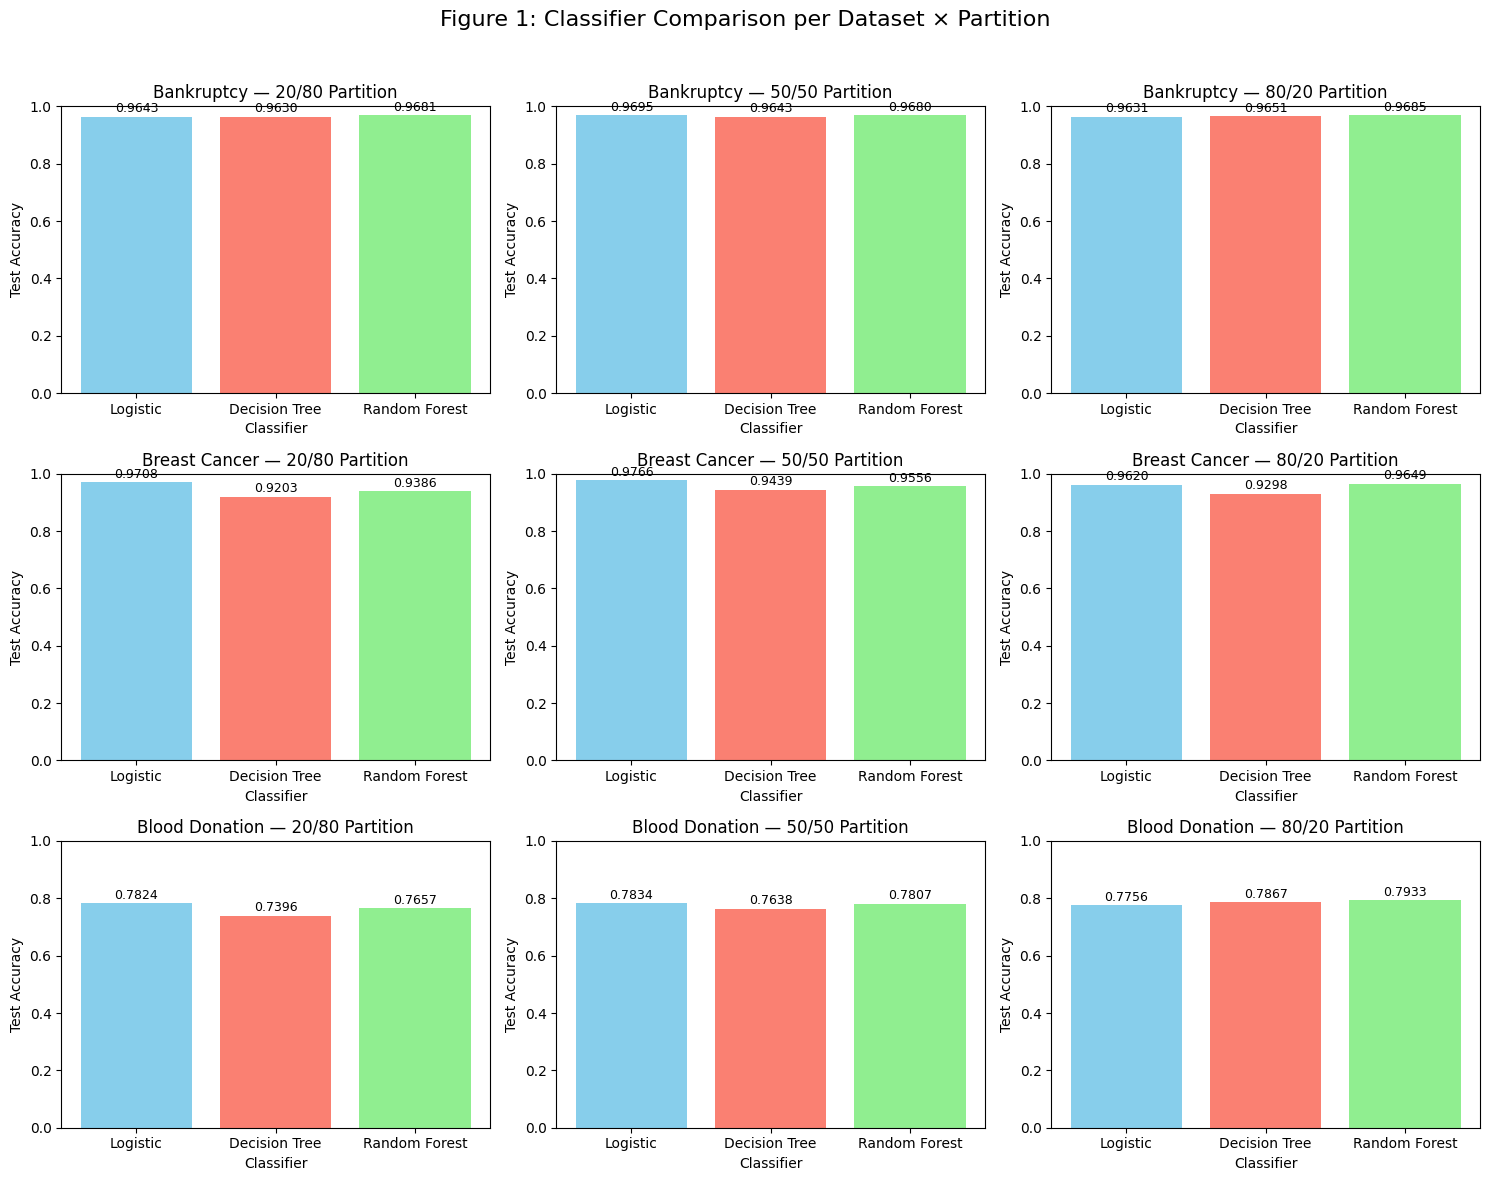

In [263]:
# Create a 3x3 grid of plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Figure 1: Classifier Comparison per Dataset × Partition", fontsize=16)

# Loop over datasets and partitions
for row_idx, (dataset_name, dataset_tag) in enumerate(datasets.items()):
    for col_idx, partition in enumerate(partitions):
        classifier_accs = [
            get_test_acc(dataset_tag, "20" if partition=="20/80" else "50" if partition=="50/50" else "80", "log"),
            get_test_acc(dataset_tag, "20" if partition=="20/80" else "50" if partition=="50/50" else "80", "dt"),
            get_test_acc(dataset_tag, "20" if partition=="20/80" else "50" if partition=="50/50" else "80", "rf")
        ]
        
        ax = axes[row_idx, col_idx]
        bars = ax.bar(classifiers, classifier_accs, color=['skyblue','salmon','lightgreen'])
        
        # Annotate bars with values
        for bar, acc in zip(bars, classifier_accs):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f"{acc:.4f}",
                    ha='center', va='bottom', fontsize=9)
        
        ax.set_ylim(0, 1.0)
        ax.set_title(f"{dataset_name} — {partition} Partition")
        ax.set_ylabel("Test Accuracy")
        ax.set_xlabel("Classifier")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.show()


#### __Partitions Comparison Per Classifier__
Compare different partitions (20/80, 50/50, 80/20) for each classifier on each dataset based on training, testing, and cross validation accuracies

##### Comparison tables

Table function for one dataset and one classifier

In [264]:
# Function to create a partition-comparison table for one dataset & one classifier
def build_partition_comparison_table(dataset_name, classifier_tag,
                                     avg_train_20, avg_cv_20, avg_test_20,
                                     avg_train_50, avg_cv_50, avg_test_50,
                                     avg_train_80, avg_cv_80, avg_test_80):
    data = {
        "Partition": ["20/80", "50/50", "80/20"],
        "Train Acc (avg)": [avg_train_20, avg_train_50, avg_train_80],
        "CV Acc (avg)":    [avg_cv_20, avg_cv_50, avg_cv_80],
        "Test Acc (avg)":  [avg_test_20, avg_test_50, avg_test_80]
    }
    
    df = pd.DataFrame(data)
    
    # Highlight best Test accuracy in the table
    best_test_idx = df["Test Acc (avg)"].idxmax()
    df["Test Acc (avg)"] = df.apply(
        lambda row: f"**{row['Test Acc (avg)']:.4f}**" if row.name==best_test_idx else f"{row['Test Acc (avg)']:.4f}", 
        axis=1
    )
    
    print(f"{dataset_name} — {classifier_tag} Partition Comparison")
    return df

__Table 3:__ Logistic Regression Partition Comparison

In [265]:
df_log_bank = build_partition_comparison_table(
    "Table 3.1 Bankruptcy Dataset", "Logistic Regression",
    avg_train_bank_20_log, avg_cv_acc_bank_20_log, avg_test_bank_20_log,
    avg_train_bank_50_log, avg_cv_acc_bank_50_log, avg_test_bank_50_log,
    avg_train_bank_80_log, avg_cv_acc_bank_80_log, avg_test_bank_80_log
)
display(df_log_bank)

df_log_cancer = build_partition_comparison_table(
    "Table 3.2 Breast Cancer Dataset", "Logistic Regression",
    avg_train_cancer_20_log, avg_cv_acc_cancer_20_log, avg_test_cancer_20_log,
    avg_train_cancer_50_log, avg_cv_acc_cancer_50_log, avg_test_cancer_50_log,
    avg_train_cancer_80_log, avg_cv_acc_cancer_80_log, avg_test_cancer_80_log
)
display(df_log_cancer)

df_log_blood = build_partition_comparison_table(
    "Table 3.3 Blood Donation Dataset", "Logistic Regression",
    avg_train_blood_20_log, avg_cv_acc_blood_20_log, avg_test_blood_20_log,
    avg_train_blood_50_log, avg_cv_acc_blood_50_log, avg_test_blood_50_log,
    avg_train_blood_80_log, avg_cv_acc_blood_80_log, avg_test_blood_80_log
)
display(df_log_blood)

Table 3.1 Bankruptcy Dataset — Logistic Regression Partition Comparison


,Partition,Train Acc (avg),CV Acc (avg),Test Acc (avg)
0,20/80,0.972609,0.966980,0.9643
1,50/50,0.968906,0.966755,**0.9695**
2,80/20,0.970975,0.969630,0.9631


Table 3.2 Breast Cancer Dataset — Logistic Regression Partition Comparison


,Partition,Train Acc (avg),CV Acc (avg),Test Acc (avg)
0,20/80,0.988201,0.967852,0.9708
1,50/50,0.978873,0.977694,**0.9766**
2,80/20,0.982418,0.980220,0.9620


Table 3.3 Blood Donation Dataset — Logistic Regression Partition Comparison


,Partition,Train Acc (avg),CV Acc (avg),Test Acc (avg)
0,20/80,0.744966,0.744904,0.7824
1,50/50,0.762923,0.765538,**0.7834**
2,80/20,0.775362,0.776517,0.7756


__Table 4:__ Decision Tree Partition Comparison

In [266]:
df_dt_bank = build_partition_comparison_table(
    "Table 4.1 Bankruptcy Dataset", "Decision Tree",
    avg_train_bank_20_dt, avg_cv_acc_bank_20_dt, avg_test_bank_20_dt,
    avg_train_bank_50_dt, avg_cv_acc_bank_50_dt, avg_test_bank_50_dt,
    avg_train_bank_80_dt, avg_cv_acc_bank_80_dt, avg_test_bank_80_dt
)
display(df_dt_bank)

df_dt_cancer = build_partition_comparison_table(
    "Table 4.2 Breast Cancer Dataset", "Decision Tree",
    avg_train_cancer_20_dt, avg_cv_acc_cancer_20_dt, avg_test_cancer_20_dt,
    avg_train_cancer_50_dt, avg_cv_acc_cancer_50_dt, avg_test_cancer_50_dt,
    avg_train_cancer_80_dt, avg_cv_acc_cancer_80_dt, avg_test_cancer_80_dt
)
display(df_dt_cancer)

df_dt_blood = build_partition_comparison_table(
    "Table 4.3 Blood Donation Dataset", "Decision Tree",
    avg_train_blood_20_dt, avg_cv_acc_blood_20_dt, avg_test_blood_20_dt,
    avg_train_blood_50_dt, avg_cv_acc_blood_50_dt, avg_test_blood_50_dt,
    avg_train_blood_80_dt, avg_cv_acc_blood_80_dt, avg_test_blood_80_dt
)
display(df_dt_blood)

Table 4.1 Bankruptcy Dataset — Decision Tree Partition Comparison


,Partition,Train Acc (avg),CV Acc (avg),Test Acc (avg)
0,20/80,0.979946,0.964287,0.9630
1,50/50,0.974773,0.966267,0.9643
2,80/20,0.973480,0.969264,**0.9651**


Table 4.2 Breast Cancer Dataset — Decision Tree Partition Comparison


,Partition,Train Acc (avg),CV Acc (avg),Test Acc (avg)
0,20/80,0.997050,0.914229,0.9203
1,50/50,0.994131,0.942460,**0.9439**
2,80/20,0.983883,0.939194,0.9298


Table 4.3 Blood Donation Dataset — Decision Tree Partition Comparison


,Partition,Train Acc (avg),CV Acc (avg),Test Acc (avg)
0,20/80,0.843400,0.767203,0.7396
1,50/50,0.817291,0.775375,0.7638
2,80/20,0.797659,0.775359,**0.7867**


__Table 5:__ Random Forest Partition Comparison

In [267]:
df_rf_bank = build_partition_comparison_table(
    "Table 5.1 Bankruptcy Dataset", "Random Forest",
    avg_train_bank_20_rf, avg_cv_acc_bank_20_rf, avg_test_bank_20_rf,
    avg_train_bank_50_rf, avg_cv_acc_bank_50_rf, avg_test_bank_50_rf,
    avg_train_bank_80_rf, avg_cv_acc_bank_80_rf, avg_test_bank_80_rf
)
display(df_rf_bank)

df_rf_cancer = build_partition_comparison_table(
    "Table 5.2 Breast Cancer Dataset", "Random Forest",
    avg_train_cancer_20_rf, avg_cv_acc_cancer_20_rf, avg_test_cancer_20_rf,
    avg_train_cancer_50_rf, avg_cv_acc_cancer_50_rf, avg_test_cancer_50_rf,
    avg_train_cancer_80_rf, avg_cv_acc_cancer_80_rf, avg_test_cancer_80_rf
)
display(df_rf_cancer)

df_rf_blood = build_partition_comparison_table(
    "Table 5.3 Blood Donation Dataset", "Random Forest",
    avg_train_blood_20_rf, avg_cv_acc_blood_20_rf, avg_test_blood_20_rf,
    avg_train_blood_50_rf, avg_cv_acc_blood_50_rf, avg_test_blood_50_rf,
    avg_train_blood_80_rf, avg_cv_acc_blood_80_rf, avg_test_blood_80_rf
)
display(df_rf_blood)

Table 5.1 Bankruptcy Dataset — Random Forest Partition Comparison


,Partition,Train Acc (avg),CV Acc (avg),Test Acc (avg)
0,20/80,0.983859,0.970409,0.9681
1,50/50,0.982595,0.970960,0.9680
2,80/20,0.987046,0.970608,**0.9685**


Table 5.2 Breast Cancer Dataset — Random Forest Partition Comparison


,Partition,Train Acc (avg),CV Acc (avg),Test Acc (avg)
0,20/80,1.000000,0.952437,0.9386
1,50/50,0.992958,0.951838,0.9556
2,80/20,0.998535,0.961905,**0.9649**


Table 5.3 Blood Donation Dataset — Random Forest Partition Comparison


,Partition,Train Acc (avg),CV Acc (avg),Test Acc (avg)
0,20/80,0.876957,0.798697,0.7657
1,50/50,0.836007,0.791459,0.7807
2,80/20,0.812709,0.775924,**0.7933**


##### Partition Comparison Line Charts

Set up

In [268]:
# Classifiers
classifiers = ["log", "dt", "rf"]
classifier_names = {"log": "Logistic Regression", "dt": "Decision Tree", "rf": "Random Forest"}

# Datasets
datasets = {
    "Bankruptcy Dataset": "bank",
    "Breast Cancer Dataset": "cancer",
    "Blood Donation Dataset": "blood"
}

# Training ratios
ratios = ["20", "50", "80"]
ratio_labels = ["20%", "50%", "80%"]

# Function to get test accuracy dynamically
def get_test_acc(dataset_tag, ratio_tag, classifier_tag):
    var_name = f"avg_test_{dataset_tag}_{ratio_tag}_{classifier_tag}"
    return globals()[var_name]


__Figure 2:__ Line Chart - Partition Comparison Across Datasets Per Classifier

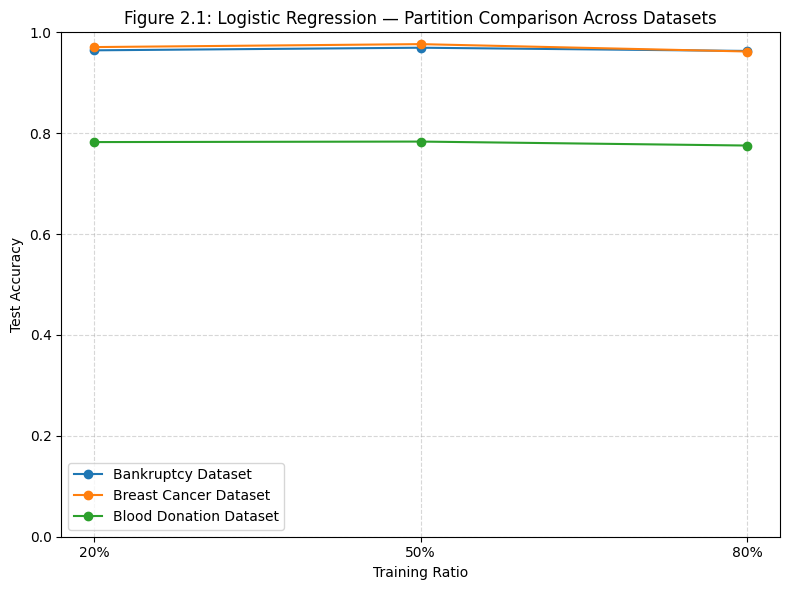

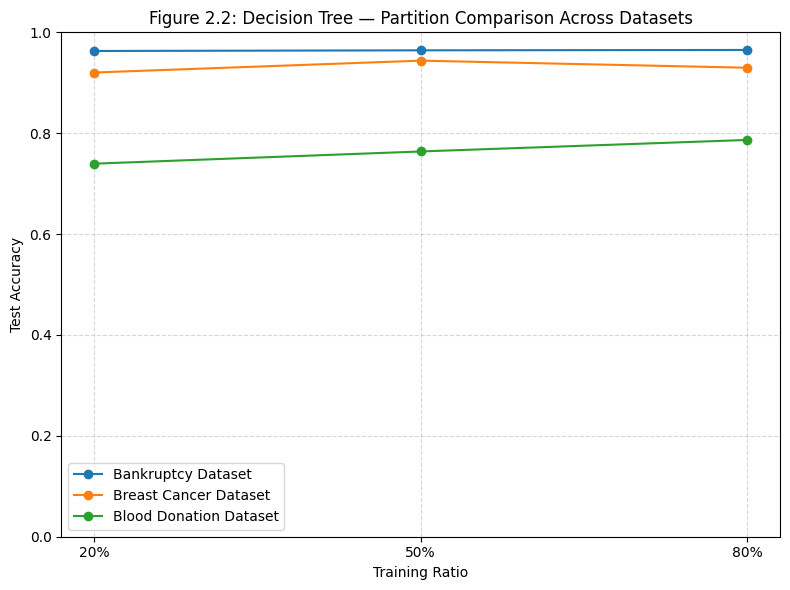

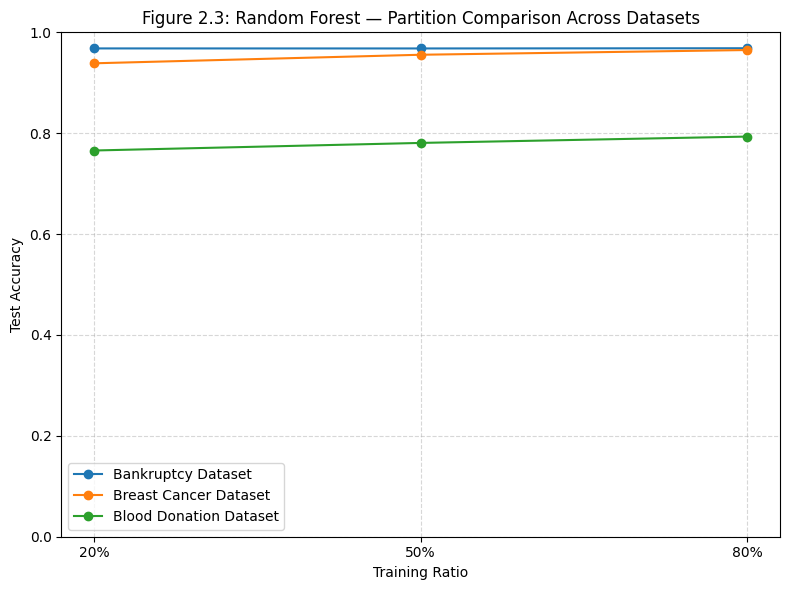

In [ ]:
# Generate a figure per classifier
for i, clf in enumerate(classifiers, start=1):
    plt.figure(figsize=(8,6))
    
    for dataset_name, dataset_tag in datasets.items():
        # Get test accuracies for all training ratios
        accs = [get_test_acc(dataset_tag, r, clf) for r in ratios]
        plt.plot(ratio_labels, accs, marker='o', label=dataset_name)
    
    plt.title(f"Figure 2.{i}: {classifier_names[clf]} — Partition Comparison Across Datasets")
    plt.xlabel("Training Ratio")
    plt.ylabel("Test Accuracy")
    plt.ylim(0, 1.0)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

#### __Ranking Best Classifier Per Dataset__
Based on average testing accuracy

Set up

In [270]:
# Classifiers
classifiers = ["log", "dt", "rf"]
classifier_names = {"log": "Logistic Regression", "dt": "Decision Tree", "rf": "Random Forest"}

# Datasets
datasets = {
    "6.1": ("Bankruptcy Dataset", "bank"),
    "6.2": ("Breast Cancer Dataset", "cancer"),
    "6.3": ("Blood Donation Dataset", "blood")
}

# Training ratios
ratios = ["20", "50", "80"]

# Function to get test accuracy dynamically
def get_test_acc(dataset_tag, ratio_tag, classifier_tag):
    var_name = f"avg_test_{dataset_tag}_{ratio_tag}_{classifier_tag}"
    return globals()[var_name]

__Table 6:__ Classifier Ranking on Per Dataset

In [271]:
# Generate ranking table per dataset
for table_id, (dataset_name, dataset_tag) in datasets.items():
    data = []
    for clf in classifiers:
        # Compute average test accuracy across all partitions
        avg_test_acc = np.mean([get_test_acc(dataset_tag, r, clf) for r in ratios])
        data.append((classifier_names[clf], avg_test_acc))
    
    # Sort by descending accuracy
    data_sorted = sorted(data, key=lambda x: x[1], reverse=True)
    
    # Build DataFrame
    df_ranking = pd.DataFrame({
        "Rank": range(1, len(data_sorted)+1),
        "Classifier": [x[0] for x in data_sorted],
        "Avg Test Accuracy": [x[1] for x in data_sorted]
    })
    
    print(f"Table {table_id}: Classifier Ranking — {dataset_name} Dataset")
    display(df_ranking)

Table 6.1: Classifier Ranking — Bankruptcy Dataset Dataset


,Rank,Classifier,Avg Test Accuracy
0,1,Random Forest,0.968206
1,2,Logistic Regression,0.965640
2,3,Decision Tree,0.964137


Table 6.2: Classifier Ranking — Breast Cancer Dataset Dataset


,Rank,Classifier,Avg Test Accuracy
0,1,Logistic Regression,0.969786
1,2,Random Forest,0.953021
2,3,Decision Tree,0.931335


Table 6.3: Classifier Ranking — Blood Donation Dataset Dataset


,Rank,Classifier,Avg Test Accuracy
0,1,Logistic Regression,0.780464
1,2,Random Forest,0.779934
2,3,Decision Tree,0.763349


#### __Ranking Best Classifier Overall__
Base on average testing accuracy across all datasets x partitions

Set up

In [272]:
# Classifiers
classifiers = ["log", "dt", "rf"]
classifier_names = {"log": "Logistic Regression", "dt": "Decision Tree", "rf": "Random Forest"}

# Datasets
datasets = {
    "Bankruptcy": "bank",
    "Breast Cancer": "cancer",
    "Blood Donation": "blood"
}

# Training ratios
ratios = ["20", "50", "80"]

Compute average testing accuracy for each classifier across all datasets and partitions

In [273]:
mean_test_accs = []

for clf in classifiers:
    all_accs = []
    for dataset_tag in datasets.values():
        for r in ratios:
            var_name = f"avg_test_{dataset_tag}_{r}_{clf}"
            all_accs.append(globals()[var_name])
    mean_test_accs.append(np.mean(all_accs))

__Table 7:__ Overall Classifier Ranking

In [274]:
# Create DataFrame for ranking
ranking_df = pd.DataFrame({
    "Classifier": [classifier_names[clf] for clf in classifiers],
    "Mean Test Accuracy": mean_test_accs
})

# Sort by accuracy descending
ranking_df = ranking_df.sort_values(by="Mean Test Accuracy", ascending=False).reset_index(drop=True)
ranking_df.index += 1  # Rank starts at 1
ranking_df.index.name = "Rank"

print("Table 7: Overall Classifier Ranking")
display(ranking_df)

Table 7: Overall Classifier Ranking


,Classifier,Mean Test Accuracy
Rank,,
1,Logistic Regression,0.905297
2,Random Forest,0.900387
3,Decision Tree,0.886274
